# Automatic data downloading

* In this example we will show how one can download data from a jupyter notebook.
* The [PhysOcean](https://github.com/gher-ulg/PhysOcean.jl) module provides ways to automatically download data from the [World Ocean Database](https://www.nodc.noaa.gov/OC5/WOD/pr_wod.html) and from [CMEMS](http://marine.copernicus.eu/) In-Situ TAC.

This module can be installed by: 

```julia
using Pkg
Pkg.add("PhysOcean")
```


In [1]:
using PyPlot              # Visualization package
using PhysOcean           # Download data from the World Ocean Database
using DIVAnd              # DIVAnd 
using Dates
using Statistics

## Settings
Define the time and geospatial bounding box for downloading the data

In [2]:
# resolution (the resolution is only used for DIVAnd analyses)
dx = dy = 0.25   # medium size test 

# vectors defining the longitude and latitudes grids
# Here longitude and latitude correspond to the Mediterranean Sea
lonr = -7:dx:37
latr = 30:dy:46

# time range of the in-situ data
timerange = [Date(2016,1,1),Date(2016,12,31)]

2-element Array{Date,1}:
 2016-01-01
 2016-12-31

In [3]:
# Name of the variable
varname = "Salinity"

"Salinity"

Please use your own email address (!) 😉     
It is only use to get notified by mail once the dataset is ready.

In [6]:
if isfile("email.txt")
    email = strip(read("email.txt",String));
    @info("Getting email address from email.txt");
else
    @warn("Create a file 'email.txt' if you want to query data to the World Ocean Database")
    
end

# Email for downloading the data
# Indicate here your email address
# email = "___@____.__"

┌ Warning: Create a file 'email.txt' if you want to query data to the World Ocean Database
└ @ Main In[6]:5


## Download the data

* World Ocean Database: example for bulk access data by simulating a web-user.
* Downloading can take several tens of minutes.
* SeaDataNet will provide a dedicated machine-to-machine interface during the SeaDataCloud project

In [7]:
?WorldOceanDatabase.download

```
dirnames,indexnames = WorldOceanDatabase.download(lonrange,latrange,timerange,
  variable,email,basedir)
```

Download data using the NODC web-service. The range parameters are vectors from with the frist element is the lower bound and the last element is the upper bound. The parameters of the functions will be transmitted to nodc.noaa.gov (http://www.noaa.gov/privacy.html). Note that no XBT corrections are applied. The table below show the avialable variable and their units.

Example:

dirnames,indexnames = WorldOceanDatabase.download([0,10],[30,40],     [DateTime(2000,1,1),DateTime(2000,2,1)],     "Temperature","your@email.com,"/tmp")

| Variables                          | Unit     |
|:---------------------------------- |:-------- |
| Temperature                        | °C       |
| Salinity                           | unitless |
| Oxygen                             | ml l⁻¹   |
| Phosphate                          | µM       |
| Silicate                           | µM       |
| Nitrate and Nitrate+Nitrite        | µM       |
| pH                                 | unitless |
| Chlorophyll                        | µg l⁻¹   |
| Plankton                           | multiple |
| Alkalinity                         | meq l⁻¹  |
| Partial Pressure of Carbon Dioxide | µatm     |
| Dissolved Inorganic Carbon         | mM       |
| Transmissivity                     | m⁻¹      |
| Pressure                           | dbar     |
| Air temperature                    | °C       |
| CO2 warming                        | °C       |
| CO2 atmosphere                     | ppm      |
| Air pressure                       | mbar     |
| Tritium                            | TU       |
| Helium                             | nM       |
| Delta Helium-3                     | %        |
| Delta Carbon-14                    | ᵒ/ᵒᵒ     |
| Delta Carbon-13                    | ᵒ/ᵒᵒ     |
| Argon                              | nM       |
| Neon                               | nM       |
| Chlorofluorocarbon 11 (CFC 11)     | pM       |
| Chlorofluorocarbon 12 (CFC 12)     | pM       |
| Chlorofluorocarbon 113 (CFC 113)   | pM       |
| Delta Oxygen-18                    | ᵒ/ᵒᵒ     |


Define the directory where the results will be saved. This directory must exists and must be empty.   
The command `mkpath` will create this path (including parent path).

In [10]:
basedir = "./data/WOD-temporary-dir"
isdir(basedir) ? rm(basedir,recursive=true) : mkpath(basedir)
WorldOceanDatabase.download(lonr, latr, timerange, varname, email, basedir);

Downloadling from World Ocean Database can take some time, the result from the previous request can be download directly:

In [12]:
run(pipeline(`curl https://dox.ulg.ac.be/index.php/s/8tRk0NAStr2P70j/download`,`tar -C data -xvzf -`));

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

WOD-temporary-dir/
WOD-temporary-dir/PFL/
WOD-temporary-dir/PFL/wod_017424830O.nc
WOD-temporary-dir/PFL/wod_017867477O.nc
WOD-temporary-dir/PFL/wod_017868469O.nc
WOD-temporary-dir/PFL/wod_017708710O.nc
WOD-temporary-dir/PFL/wod_017705460O.nc
WOD-temporary-dir/PFL/wod_017416833O.nc
WOD-temporary-dir/PFL/wod_017709684O.nc
WOD-temporary-dir/PFL/wod_017893158O.nc
WOD-temporary-dir/PFL/wod_017866617O.nc
WOD-temporary-dir/PFL/wod_017782318O.nc
WOD-temporary-dir/PFL/wod_017403893O.nc
WOD-temporary-dir/PFL/wod_017430010O.nc
WOD-temporary-dir/PFL/wod_017754845O.nc
WOD-temporary-dir/PFL/wod_017752516O.nc
WOD-temporary-dir/PFL/wod_017769855O.nc
WOD-temporary-dir/PFL/wod_017775580O.nc
WOD-temporary-dir/PFL/wod_017758088O.nc
WOD-temporary-dir/PFL/wod_017870101O.nc
WOD-temporary-dir/PFL/wod_017881952O.nc
WOD-temporary-dir/PFL/wod_017775956O.nc
WOD-temporary-dir/PFL/wod_018667651O.nc
WOD-temporary-dir/PFL/wod_017870424O.nc
WOD-temporary-dir/PFL/wod_017888245O.nc
WOD-temporary-dir/PFL/wod_017699430O.n

  0  156M    0  400k    0     0   302k      0  0:08:50  0:00:01  0:08:49  302k

WOD-temporary-dir/PFL/wod_017870543O.nc
WOD-temporary-dir/PFL/wod_017879718O.nc
WOD-temporary-dir/PFL/wod_017691560O.nc
WOD-temporary-dir/PFL/wod_017867867O.nc
WOD-temporary-dir/PFL/wod_017440303O.nc
WOD-temporary-dir/PFL/wod_017761137O.nc
WOD-temporary-dir/PFL/wod_017867224O.nc
WOD-temporary-dir/PFL/wod_017870901O.nc
WOD-temporary-dir/PFL/wod_017886016O.nc
WOD-temporary-dir/PFL/wod_018149921O.nc
WOD-temporary-dir/PFL/wod_017751977O.nc
WOD-temporary-dir/PFL/wod_017752403O.nc
WOD-temporary-dir/PFL/wod_017782638O.nc
WOD-temporary-dir/PFL/wod_017873780O.nc
WOD-temporary-dir/PFL/wod_017895659O.nc
WOD-temporary-dir/PFL/wod_017866242O.nc
WOD-temporary-dir/PFL/wod_017869837O.nc
WOD-temporary-dir/PFL/wod_017906692O.nc
WOD-temporary-dir/PFL/wod_017868524O.nc
WOD-temporary-dir/PFL/wod_017869372O.nc
WOD-temporary-dir/PFL/wod_017882081O.nc
WOD-temporary-dir/PFL/wod_017883883O.nc
WOD-temporary-dir/PFL/wod_017711230O.nc
WOD-temporary-dir/PFL/wod_017432833O.nc
WOD-temporary-dir/PFL/wod_017872925O.nc


  0  156M    0 1440k    0     0   628k      0  0:04:14  0:00:02  0:04:12  628k

WOD-temporary-dir/PFL/wod_017762465O.nc
WOD-temporary-dir/PFL/wod_017877303O.nc
WOD-temporary-dir/PFL/wod_017867297O.nc
WOD-temporary-dir/PFL/wod_017867195O.nc
WOD-temporary-dir/PFL/wod_017909953O.nc
WOD-temporary-dir/PFL/wod_017870680O.nc
WOD-temporary-dir/PFL/wod_017691698O.nc
WOD-temporary-dir/PFL/wod_017427711O.nc
WOD-temporary-dir/PFL/wod_017402722O.nc
WOD-temporary-dir/PFL/wod_017867470O.nc
WOD-temporary-dir/PFL/wod_017754591O.nc
WOD-temporary-dir/PFL/wod_017701559O.nc
WOD-temporary-dir/PFL/wod_017696941O.nc
WOD-temporary-dir/PFL/wod_017417091O.nc
WOD-temporary-dir/PFL/wod_017404198O.nc
WOD-temporary-dir/PFL/wod_017434097O.nc
WOD-temporary-dir/PFL/wod_017411584O.nc
WOD-temporary-dir/PFL/wod_017866315O.nc
WOD-temporary-dir/PFL/wod_017674549O.nc
WOD-temporary-dir/PFL/wod_017703306O.nc
WOD-temporary-dir/PFL/wod_017752232O.nc
WOD-temporary-dir/PFL/wod_017907150O.nc
WOD-temporary-dir/PFL/wod_017866203O.nc
WOD-temporary-dir/PFL/wod_017895632O.nc
WOD-temporary-dir/PFL/wod_017422148O.nc


WOD-temporary-dir/PFL/wod_017869238O.nc
WOD-temporary-dir/PFL/wod_017868453O.nc
WOD-temporary-dir/PFL/wod_017413048O.nc
WOD-temporary-dir/PFL/wod_017870893O.nc
WOD-temporary-dir/PFL/wod_017423792O.nc
WOD-temporary-dir/PFL/wod_017676879O.nc
WOD-temporary-dir/PFL/wod_017410405O.nc
WOD-temporary-dir/PFL/wod_017897297O.nc
WOD-temporary-dir/PFL/wod_017903783O.nc
WOD-temporary-dir/PFL/wod_017871194O.nc
WOD-temporary-dir/PFL/wod_017870832O.nc
WOD-temporary-dir/PFL/wod_017774728O.nc
WOD-temporary-dir/PFL/wod_018467320O.nc
WOD-temporary-dir/PFL/wod_017701136O.nc
WOD-temporary-dir/PFL/wod_017691603O.nc
WOD-temporary-dir/PFL/wod_017752528O.nc
WOD-temporary-dir/PFL/wod_017783294O.nc
WOD-temporary-dir/PFL/wod_017678284O.nc
WOD-temporary-dir/PFL/wod_017752713O.nc
WOD-temporary-dir/PFL/wod_017877721O.nc
WOD-temporary-dir/PFL/wod_017783854O.nc
WOD-temporary-dir/PFL/wod_017405219O.nc
WOD-temporary-dir/PFL/wod_017752674O.nc
WOD-temporary-dir/PFL/wod_017870585O.nc
WOD-temporary-dir/PFL/wod_018467318O.nc


  1  156M    1 2752k    0     0   836k      0  0:03:11  0:00:03  0:03:08  836k

WOD-temporary-dir/PFL/wod_017874463O.nc
WOD-temporary-dir/PFL/wod_017868816O.nc
WOD-temporary-dir/PFL/wod_017765611O.nc
WOD-temporary-dir/PFL/wod_017788601O.nc
WOD-temporary-dir/PFL/wod_017779876O.nc
WOD-temporary-dir/PFL/wod_017866354O.nc
WOD-temporary-dir/PFL/wod_017759096O.nc
WOD-temporary-dir/PFL/wod_017900754O.nc
WOD-temporary-dir/PFL/wod_018149275O.nc
WOD-temporary-dir/PFL/wod_017870137O.nc
WOD-temporary-dir/PFL/wod_017766677O.nc
WOD-temporary-dir/PFL/wod_017410580O.nc
WOD-temporary-dir/PFL/wod_017879087O.nc
WOD-temporary-dir/PFL/wod_017752123O.nc
WOD-temporary-dir/PFL/wod_017416598O.nc
WOD-temporary-dir/PFL/wod_017868763O.nc
WOD-temporary-dir/PFL/wod_017866538O.nc
WOD-temporary-dir/PFL/wod_017868885O.nc
WOD-temporary-dir/PFL/wod_017895746O.nc
WOD-temporary-dir/PFL/wod_017784187O.nc
WOD-temporary-dir/PFL/wod_017431005O.nc
WOD-temporary-dir/PFL/wod_017873889O.nc
WOD-temporary-dir/PFL/wod_017892299O.nc
WOD-temporary-dir/PFL/wod_017412977O.nc
WOD-temporary-dir/PFL/wod_017887290O.nc


WOD-temporary-dir/PFL/wod_017784271O.nc
WOD-temporary-dir/PFL/wod_017899067O.nc
WOD-temporary-dir/PFL/wod_017692367O.nc
WOD-temporary-dir/PFL/wod_017909222O.nc
WOD-temporary-dir/PFL/wod_017869513O.nc
WOD-temporary-dir/PFL/wod_017868168O.nc
WOD-temporary-dir/PFL/wod_017763788O.nc
WOD-temporary-dir/PFL/wod_017905721O.nc
WOD-temporary-dir/PFL/wod_017783396O.nc
WOD-temporary-dir/PFL/wod_017712453O.nc
WOD-temporary-dir/PFL/wod_017687284O.nc
WOD-temporary-dir/PFL/wod_017882425O.nc
WOD-temporary-dir/PFL/wod_017874580O.nc
WOD-temporary-dir/PFL/wod_017762120O.nc
WOD-temporary-dir/PFL/wod_017696993O.nc
WOD-temporary-dir/PFL/wod_017424669O.nc
WOD-temporary-dir/PFL/wod_017886852O.nc
WOD-temporary-dir/PFL/wod_017699305O.nc
WOD-temporary-dir/PFL/wod_017788973O.nc
WOD-temporary-dir/PFL/wod_017866955O.nc
WOD-temporary-dir/PFL/wod_017687195O.nc
WOD-temporary-dir/PFL/wod_017866831O.nc
WOD-temporary-dir/PFL/wod_017896052O.nc
WOD-temporary-dir/PFL/wod_017883250O.nc
WOD-temporary-dir/PFL/wod_017895976O.nc


  2  156M    2 4400k    0     0  1026k      0  0:02:36  0:00:04  0:02:32 1026k

WOD-temporary-dir/PFL/wod_017867205O.nc
WOD-temporary-dir/PFL/wod_017706006O.nc
WOD-temporary-dir/PFL/wod_017431954O.nc
WOD-temporary-dir/PFL/wod_017866326O.nc
WOD-temporary-dir/PFL/wod_017781989O.nc
WOD-temporary-dir/PFL/wod_017714176O.nc
WOD-temporary-dir/PFL/wod_017900620O.nc
WOD-temporary-dir/PFL/wod_017893048O.nc
WOD-temporary-dir/PFL/wod_017893717O.nc
WOD-temporary-dir/PFL/wod_017882304O.nc
WOD-temporary-dir/PFL/wod_017869414O.nc
WOD-temporary-dir/PFL/wod_017894419O.nc
WOD-temporary-dir/PFL/wod_017898993O.nc
WOD-temporary-dir/PFL/wod_017701950O.nc
WOD-temporary-dir/PFL/wod_017890093O.nc
WOD-temporary-dir/PFL/wod_017783466O.nc
WOD-temporary-dir/PFL/wod_017699055O.nc
WOD-temporary-dir/PFL/wod_017708409O.nc
WOD-temporary-dir/PFL/wod_017866827O.nc
WOD-temporary-dir/PFL/wod_017435596O.nc
WOD-temporary-dir/PFL/wod_017406551O.nc
WOD-temporary-dir/PFL/wod_017414998O.nc
WOD-temporary-dir/PFL/wod_017696496O.nc
WOD-temporary-dir/PFL/wod_017895942O.nc
WOD-temporary-dir/PFL/wod_017769045O.nc


WOD-temporary-dir/PFL/wod_017888244O.nc
WOD-temporary-dir/PFL/wod_017868536O.nc
WOD-temporary-dir/PFL/wod_017714771O.nc
WOD-temporary-dir/PFL/wod_017685920O.nc
WOD-temporary-dir/PFL/wod_017406580O.nc
WOD-temporary-dir/PFL/wod_017753617O.nc
WOD-temporary-dir/PFL/wod_017868821O.nc
WOD-temporary-dir/PFL/wod_017693827O.nc
WOD-temporary-dir/PFL/wod_017762564O.nc
WOD-temporary-dir/PFL/wod_017870750O.nc
WOD-temporary-dir/PFL/wod_017866450O.nc
WOD-temporary-dir/PFL/wod_017897982O.nc
WOD-temporary-dir/PFL/wod_017764680O.nc
WOD-temporary-dir/PFL/wod_018667658O.nc
WOD-temporary-dir/PFL/wod_017873922O.nc
WOD-temporary-dir/PFL/wod_017869009O.nc
WOD-temporary-dir/PFL/wod_017872618O.nc
WOD-temporary-dir/PFL/wod_017678498O.nc
WOD-temporary-dir/PFL/wod_017702828O.nc
WOD-temporary-dir/PFL/wod_017405662O.nc
WOD-temporary-dir/PFL/wod_017403892O.nc
WOD-temporary-dir/PFL/wod_017869473O.nc
WOD-temporary-dir/PFL/wod_017906252O.nc
WOD-temporary-dir/PFL/wod_017414522O.nc
WOD-temporary-dir/PFL/wod_017403451O.nc


  3  156M    3 6208k    0     0  1173k      0  0:02:16  0:00:05  0:02:11 1248k

WOD-temporary-dir/PFL/wod_018149196O.nc
WOD-temporary-dir/PFL/wod_017870024O.nc
WOD-temporary-dir/PFL/wod_017876771O.nc
WOD-temporary-dir/PFL/wod_017427282O.nc
WOD-temporary-dir/PFL/wod_017698587O.nc
WOD-temporary-dir/PFL/wod_017899282O.nc
WOD-temporary-dir/PFL/wod_017699152O.nc
WOD-temporary-dir/PFL/wod_017690562O.nc
WOD-temporary-dir/PFL/wod_017687073O.nc
WOD-temporary-dir/PFL/wod_017784803O.nc
WOD-temporary-dir/PFL/wod_017871271O.nc
WOD-temporary-dir/PFL/wod_017705547O.nc
WOD-temporary-dir/PFL/wod_017689995O.nc
WOD-temporary-dir/PFL/wod_017903606O.nc
WOD-temporary-dir/PFL/wod_017408946O.nc
WOD-temporary-dir/PFL/wod_017682254O.nc
WOD-temporary-dir/PFL/wod_017411855O.nc
WOD-temporary-dir/PFL/wod_017754936O.nc
WOD-temporary-dir/PFL/wod_017869741O.nc
WOD-temporary-dir/PFL/wod_017908016O.nc
WOD-temporary-dir/PFL/wod_017896816O.nc
WOD-temporary-dir/PFL/wod_017705550O.nc
WOD-temporary-dir/PFL/wod_017779996O.nc
WOD-temporary-dir/PFL/wod_017425205O.nc
WOD-temporary-dir/PFL/wod_017773928O.nc


WOD-temporary-dir/PFL/wod_017416626O.nc
WOD-temporary-dir/PFL/wod_017894345O.nc
WOD-temporary-dir/PFL/wod_017867771O.nc
WOD-temporary-dir/PFL/wod_017893252O.nc
WOD-temporary-dir/PFL/wod_017427713O.nc
WOD-temporary-dir/PFL/wod_017408903O.nc
WOD-temporary-dir/PFL/wod_017878456O.nc
WOD-temporary-dir/PFL/wod_017354686O.nc
WOD-temporary-dir/PFL/wod_017700003O.nc
WOD-temporary-dir/PFL/wod_017895044O.nc
WOD-temporary-dir/PFL/wod_017869556O.nc
WOD-temporary-dir/PFL/wod_017442557O.nc
WOD-temporary-dir/PFL/wod_017900533O.nc
WOD-temporary-dir/PFL/wod_017418881O.nc
WOD-temporary-dir/PFL/wod_017881997O.nc
WOD-temporary-dir/PFL/wod_017868522O.nc
WOD-temporary-dir/PFL/wod_017769673O.nc
WOD-temporary-dir/PFL/wod_017676435O.nc
WOD-temporary-dir/PFL/wod_017782068O.nc
WOD-temporary-dir/PFL/wod_017767549O.nc
WOD-temporary-dir/PFL/wod_017866119O.nc
WOD-temporary-dir/PFL/wod_017765205O.nc
WOD-temporary-dir/PFL/wod_017868394O.nc
WOD-temporary-dir/PFL/wod_017780890O.nc
WOD-temporary-dir/PFL/wod_017435964O.nc


  5  156M    5 8224k    0     0  1308k      0  0:02:02  0:00:06  0:01:56 1577k

WOD-temporary-dir/PFL/wod_017905437O.nc
WOD-temporary-dir/PFL/wod_017753985O.nc
WOD-temporary-dir/PFL/wod_017891407O.nc
WOD-temporary-dir/PFL/wod_017896408O.nc
WOD-temporary-dir/PFL/wod_017771377O.nc
WOD-temporary-dir/PFL/wod_017867666O.nc
WOD-temporary-dir/PFL/wod_017435455O.nc
WOD-temporary-dir/PFL/wod_017903245O.nc
WOD-temporary-dir/PFL/wod_017907181O.nc
WOD-temporary-dir/PFL/wod_017774816O.nc
WOD-temporary-dir/PFL/wod_017900108O.nc
WOD-temporary-dir/PFL/wod_017869240O.nc
WOD-temporary-dir/PFL/wod_018149992O.nc
WOD-temporary-dir/PFL/wod_017898175O.nc
WOD-temporary-dir/PFL/wod_017762503O.nc
WOD-temporary-dir/PFL/wod_017713502O.nc
WOD-temporary-dir/PFL/wod_017702849O.nc
WOD-temporary-dir/PFL/wod_017420530O.nc
WOD-temporary-dir/PFL/wod_017428125O.nc
WOD-temporary-dir/PFL/wod_017867349O.nc
WOD-temporary-dir/PFL/wod_017867222O.nc
WOD-temporary-dir/PFL/wod_017886973O.nc
WOD-temporary-dir/PFL/wod_017752790O.nc
WOD-temporary-dir/PFL/wod_017866252O.nc
WOD-temporary-dir/PFL/wod_017884899O.nc


WOD-temporary-dir/PFL/wod_017884244O.nc
WOD-temporary-dir/PFL/wod_017424338O.nc
WOD-temporary-dir/PFL/wod_017869005O.nc
WOD-temporary-dir/PFL/wod_017790412O.nc
WOD-temporary-dir/PFL/wod_017408425O.nc
WOD-temporary-dir/PFL/wod_017752730O.nc
WOD-temporary-dir/PFL/wod_017415922O.nc
WOD-temporary-dir/PFL/wod_017752294O.nc
WOD-temporary-dir/PFL/wod_017910134O.nc
WOD-temporary-dir/PFL/wod_018149970O.nc
WOD-temporary-dir/PFL/wod_017680022O.nc
WOD-temporary-dir/PFL/wod_017867415O.nc
WOD-temporary-dir/PFL/wod_017786010O.nc
WOD-temporary-dir/PFL/wod_017443518O.nc
WOD-temporary-dir/PFL/wod_017427014O.nc
WOD-temporary-dir/PFL/wod_017752039O.nc
WOD-temporary-dir/PFL/wod_017705165O.nc
WOD-temporary-dir/PFL/wod_017707770O.nc
WOD-temporary-dir/PFL/wod_017695510O.nc
WOD-temporary-dir/PFL/wod_017885763O.nc
WOD-temporary-dir/PFL/wod_017900503O.nc
WOD-temporary-dir/PFL/wod_017685553O.nc
WOD-temporary-dir/PFL/wod_018014738O.nc
WOD-temporary-dir/PFL/wod_017874998O.nc
WOD-temporary-dir/PFL/wod_017870268O.nc


  6  156M    6  9.9M    0     0  1398k      0  0:01:54  0:00:07  0:01:47 1750k

WOD-temporary-dir/PFL/wod_017888217O.nc
WOD-temporary-dir/PFL/wod_017433446O.nc
WOD-temporary-dir/PFL/wod_017404099O.nc
WOD-temporary-dir/PFL/wod_017866670O.nc
WOD-temporary-dir/PFL/wod_017866383O.nc
WOD-temporary-dir/PFL/wod_017869633O.nc
WOD-temporary-dir/PFL/wod_017680589O.nc
WOD-temporary-dir/PFL/wod_017866468O.nc
WOD-temporary-dir/PFL/wod_017429677O.nc
WOD-temporary-dir/PFL/wod_017432759O.nc
WOD-temporary-dir/PFL/wod_017875490O.nc
WOD-temporary-dir/PFL/wod_017867728O.nc
WOD-temporary-dir/PFL/wod_017868824O.nc
WOD-temporary-dir/PFL/wod_017676717O.nc
WOD-temporary-dir/PFL/wod_017869927O.nc
WOD-temporary-dir/PFL/wod_017879190O.nc
WOD-temporary-dir/PFL/wod_017872406O.nc
WOD-temporary-dir/PFL/wod_017675362O.nc
WOD-temporary-dir/PFL/wod_017709512O.nc
WOD-temporary-dir/PFL/wod_017893747O.nc
WOD-temporary-dir/PFL/wod_017889112O.nc
WOD-temporary-dir/PFL/wod_017414318O.nc
WOD-temporary-dir/PFL/wod_017752007O.nc
WOD-temporary-dir/PFL/wod_017868333O.nc
WOD-temporary-dir/PFL/wod_017867877O.nc


WOD-temporary-dir/PFL/wod_017890351O.nc
WOD-temporary-dir/PFL/wod_017687098O.nc
WOD-temporary-dir/PFL/wod_017870783O.nc
WOD-temporary-dir/PFL/wod_017870451O.nc
WOD-temporary-dir/PFL/wod_018149301O.nc
WOD-temporary-dir/PFL/wod_017899426O.nc
WOD-temporary-dir/PFL/wod_017752085O.nc
WOD-temporary-dir/PFL/wod_017873191O.nc
WOD-temporary-dir/PFL/wod_017868102O.nc
WOD-temporary-dir/PFL/wod_017699569O.nc
WOD-temporary-dir/PFL/wod_017901825O.nc
WOD-temporary-dir/PFL/wod_017430423O.nc
WOD-temporary-dir/PFL/wod_017867704O.nc
WOD-temporary-dir/PFL/wod_017700212O.nc
WOD-temporary-dir/PFL/wod_017906189O.nc
WOD-temporary-dir/PFL/wod_017876317O.nc
WOD-temporary-dir/PFL/wod_017791141O.nc
WOD-temporary-dir/PFL/wod_017714625O.nc
WOD-temporary-dir/PFL/wod_017752244O.nc
WOD-temporary-dir/PFL/wod_017867378O.nc
WOD-temporary-dir/PFL/wod_017866809O.nc
WOD-temporary-dir/PFL/wod_017870269O.nc
WOD-temporary-dir/PFL/wod_017784614O.nc
WOD-temporary-dir/PFL/wod_017891254O.nc
WOD-temporary-dir/PFL/wod_017435930O.nc


  7  156M    7 11.8M    0     0  1470k      0  0:01:49  0:00:08  0:01:41 1887k

WOD-temporary-dir/PFL/wod_017783036O.nc
WOD-temporary-dir/PFL/wod_017773832O.nc
WOD-temporary-dir/PFL/wod_017427812O.nc
WOD-temporary-dir/PFL/wod_017752673O.nc
WOD-temporary-dir/PFL/wod_017759851O.nc
WOD-temporary-dir/PFL/wod_017790943O.nc
WOD-temporary-dir/PFL/wod_017676281O.nc
WOD-temporary-dir/PFL/wod_017760909O.nc
WOD-temporary-dir/PFL/wod_017870507O.nc
WOD-temporary-dir/PFL/wod_017873274O.nc
WOD-temporary-dir/PFL/wod_017773431O.nc
WOD-temporary-dir/PFL/wod_017866854O.nc
WOD-temporary-dir/PFL/wod_017690693O.nc
WOD-temporary-dir/PFL/wod_017422522O.nc
WOD-temporary-dir/PFL/wod_017899579O.nc
WOD-temporary-dir/PFL/wod_017437190O.nc
WOD-temporary-dir/PFL/wod_017895132O.nc
WOD-temporary-dir/PFL/wod_017774085O.nc
WOD-temporary-dir/PFL/wod_017438435O.nc
WOD-temporary-dir/PFL/wod_017786275O.nc
WOD-temporary-dir/PFL/wod_017866263O.nc
WOD-temporary-dir/PFL/wod_017786377O.nc
WOD-temporary-dir/PFL/wod_017763153O.nc
WOD-temporary-dir/PFL/wod_017867123O.nc
WOD-temporary-dir/PFL/wod_017867114O.nc


WOD-temporary-dir/PFL/wod_017433645O.nc
WOD-temporary-dir/PFL/wod_017436947O.nc
WOD-temporary-dir/PFL/wod_017713416O.nc
WOD-temporary-dir/PFL/wod_017411246O.nc
WOD-temporary-dir/PFL/wod_017870431O.nc
WOD-temporary-dir/PFL/wod_017887674O.nc
WOD-temporary-dir/PFL/wod_017868280O.nc
WOD-temporary-dir/PFL/wod_017867619O.nc
WOD-temporary-dir/PFL/wod_017896379O.nc
WOD-temporary-dir/PFL/wod_017884349O.nc
WOD-temporary-dir/PFL/wod_017437665O.nc
WOD-temporary-dir/PFL/wod_017752509O.nc
WOD-temporary-dir/PFL/wod_017871650O.nc
WOD-temporary-dir/PFL/wod_017869802O.nc
WOD-temporary-dir/PFL/wod_017881883O.nc
WOD-temporary-dir/PFL/wod_017418086O.nc
WOD-temporary-dir/PFL/wod_017871273O.nc
WOD-temporary-dir/PFL/wod_017868762O.nc
WOD-temporary-dir/PFL/wod_017752622O.nc
WOD-temporary-dir/PFL/wod_017908047O.nc
WOD-temporary-dir/PFL/wod_017886050O.nc
WOD-temporary-dir/PFL/wod_017867615O.nc
WOD-temporary-dir/PFL/wod_017870993O.nc
WOD-temporary-dir/PFL/wod_017868538O.nc
WOD-temporary-dir/PFL/wod_017901994O.nc


  8  156M    8 14.0M    0     0  1545k      0  0:01:43  0:00:09  0:01:34 1988k

WOD-temporary-dir/PFL/wod_017880134O.nc
WOD-temporary-dir/PFL/wod_017868933O.nc
WOD-temporary-dir/PFL/wod_017712144O.nc
WOD-temporary-dir/PFL/wod_017694258O.nc
WOD-temporary-dir/PFL/wod_017869052O.nc
WOD-temporary-dir/PFL/wod_017868079O.nc
WOD-temporary-dir/PFL/wod_017692445O.nc
WOD-temporary-dir/PFL/wod_017791546O.nc
WOD-temporary-dir/PFL/wod_017757223O.nc
WOD-temporary-dir/PFL/wod_017869555O.nc
WOD-temporary-dir/PFL/wod_017702971O.nc
WOD-temporary-dir/PFL/wod_017896880O.nc
WOD-temporary-dir/PFL/wod_017437854O.nc
WOD-temporary-dir/PFL/wod_017434987O.nc
WOD-temporary-dir/PFL/wod_017700412O.nc
WOD-temporary-dir/PFL/wod_017430623O.nc
WOD-temporary-dir/PFL/wod_017869114O.nc
WOD-temporary-dir/PFL/wod_017408312O.nc
WOD-temporary-dir/PFL/wod_017691217O.nc
WOD-temporary-dir/PFL/wod_017868591O.nc
WOD-temporary-dir/PFL/wod_017911951O.nc
WOD-temporary-dir/PFL/wod_017879319O.nc
WOD-temporary-dir/PFL/wod_017867400O.nc
WOD-temporary-dir/PFL/wod_017870815O.nc
WOD-temporary-dir/PFL/wod_017697276O.nc


WOD-temporary-dir/PFL/wod_017871168O.nc
WOD-temporary-dir/PFL/wod_017881833O.nc
WOD-temporary-dir/PFL/wod_017900399O.nc
WOD-temporary-dir/PFL/wod_017755283O.nc
WOD-temporary-dir/PFL/wod_017893525O.nc
WOD-temporary-dir/PFL/wod_017867223O.nc
WOD-temporary-dir/PFL/wod_017892317O.nc
WOD-temporary-dir/PFL/wod_017903788O.nc
WOD-temporary-dir/PFL/wod_017761789O.nc
WOD-temporary-dir/PFL/wod_017884254O.nc
WOD-temporary-dir/PFL/wod_017870998O.nc
WOD-temporary-dir/PFL/wod_017425976O.nc
WOD-temporary-dir/PFL/wod_017776383O.nc
WOD-temporary-dir/PFL/wod_017418934O.nc
WOD-temporary-dir/PFL/wod_017438318O.nc
WOD-temporary-dir/PFL/wod_017870450O.nc
WOD-temporary-dir/PFL/wod_017417118O.nc
WOD-temporary-dir/PFL/wod_017869034O.nc
WOD-temporary-dir/PFL/wod_017752681O.nc
WOD-temporary-dir/PFL/wod_017882042O.nc
WOD-temporary-dir/PFL/wod_017428536O.nc
WOD-temporary-dir/PFL/wod_017867414O.nc
WOD-temporary-dir/PFL/wod_017682499O.nc
WOD-temporary-dir/PFL/wod_017675344O.nc
WOD-temporary-dir/PFL/wod_017894648O.nc


 10  156M   10 15.9M    0     0  1585k      0  0:01:41  0:00:10  0:01:31 2022k

WOD-temporary-dir/PFL/wod_017431271O.nc
WOD-temporary-dir/PFL/wod_017885426O.nc
WOD-temporary-dir/PFL/wod_017713347O.nc
WOD-temporary-dir/PFL/wod_017877239O.nc
WOD-temporary-dir/PFL/wod_017911302O.nc
WOD-temporary-dir/PFL/wod_017694623O.nc
WOD-temporary-dir/PFL/wod_017431286O.nc
WOD-temporary-dir/PFL/wod_017785400O.nc
WOD-temporary-dir/PFL/wod_017698155O.nc
WOD-temporary-dir/PFL/wod_017892352O.nc
WOD-temporary-dir/PFL/wod_017873407O.nc
WOD-temporary-dir/PFL/wod_017868728O.nc
WOD-temporary-dir/PFL/wod_017435948O.nc
WOD-temporary-dir/PFL/wod_017910393O.nc
WOD-temporary-dir/PFL/wod_018014659O.nc
WOD-temporary-dir/PFL/wod_017694726O.nc
WOD-temporary-dir/PFL/wod_017776841O.nc
WOD-temporary-dir/PFL/wod_017703935O.nc
WOD-temporary-dir/PFL/wod_017888112O.nc
WOD-temporary-dir/PFL/wod_018149858O.nc
WOD-temporary-dir/PFL/wod_017866467O.nc
WOD-temporary-dir/PFL/wod_017868646O.nc
WOD-temporary-dir/PFL/wod_017752727O.nc
WOD-temporary-dir/PFL/wod_017895518O.nc
WOD-temporary-dir/PFL/wod_017705383O.nc


WOD-temporary-dir/PFL/wod_017868962O.nc
WOD-temporary-dir/PFL/wod_017757294O.nc
WOD-temporary-dir/PFL/wod_017904258O.nc
WOD-temporary-dir/PFL/wod_017901901O.nc
WOD-temporary-dir/PFL/wod_017894181O.nc
WOD-temporary-dir/PFL/wod_017785847O.nc
WOD-temporary-dir/PFL/wod_017911882O.nc
WOD-temporary-dir/PFL/wod_017868657O.nc
WOD-temporary-dir/PFL/wod_017760242O.nc
WOD-temporary-dir/PFL/wod_017687537O.nc
WOD-temporary-dir/PFL/wod_017868699O.nc
WOD-temporary-dir/PFL/wod_017782932O.nc
WOD-temporary-dir/PFL/wod_017774236O.nc
WOD-temporary-dir/PFL/wod_017870755O.nc
WOD-temporary-dir/PFL/wod_017438608O.nc
WOD-temporary-dir/PFL/wod_017876022O.nc
WOD-temporary-dir/PFL/wod_017680508O.nc
WOD-temporary-dir/PFL/wod_017696533O.nc
WOD-temporary-dir/PFL/wod_017417714O.nc
WOD-temporary-dir/PFL/wod_017706500O.nc
WOD-temporary-dir/PFL/wod_017789627O.nc
WOD-temporary-dir/PFL/wod_017437389O.nc
WOD-temporary-dir/PFL/wod_017406069O.nc
WOD-temporary-dir/PFL/wod_017871362O.nc
WOD-temporary-dir/PFL/wod_017788404O.nc


 11  156M   11 17.5M    0     0  1583k      0  0:01:41  0:00:11  0:01:30 1927k

WOD-temporary-dir/PFL/wod_017709798O.nc
WOD-temporary-dir/PFL/wod_017682648O.nc
WOD-temporary-dir/PFL/wod_017707152O.nc
WOD-temporary-dir/PFL/wod_017683097O.nc
WOD-temporary-dir/PFL/wod_017431284O.nc
WOD-temporary-dir/PFL/wod_017674528O.nc
WOD-temporary-dir/PFL/wod_017436766O.nc
WOD-temporary-dir/PFL/wod_017869759O.nc
WOD-temporary-dir/PFL/wod_017867485O.nc
WOD-temporary-dir/PFL/wod_017867980O.nc
WOD-temporary-dir/PFL/wod_017752214O.nc
WOD-temporary-dir/PFL/wod_017910055O.nc
WOD-temporary-dir/PFL/wod_017874136O.nc
WOD-temporary-dir/PFL/wod_017867921O.nc
WOD-temporary-dir/PFL/wod_017433779O.nc
WOD-temporary-dir/PFL/wod_017907346O.nc
WOD-temporary-dir/PFL/wod_017424042O.nc
WOD-temporary-dir/PFL/wod_017762270O.nc
WOD-temporary-dir/PFL/wod_017442390O.nc
WOD-temporary-dir/PFL/wod_017902318O.nc
WOD-temporary-dir/PFL/wod_017756621O.nc
WOD-temporary-dir/PFL/wod_017759441O.nc
WOD-temporary-dir/PFL/wod_017428052O.nc
WOD-temporary-dir/PFL/wod_017676876O.nc
WOD-temporary-dir/PFL/wod_017868595O.nc


 11  156M   11 18.3M    0     0  1526k      0  0:01:44  0:00:12  0:01:32 1713k

WOD-temporary-dir/PFL/wod_017869560O.nc
WOD-temporary-dir/PFL/wod_017868614O.nc
WOD-temporary-dir/PFL/wod_017866373O.nc
WOD-temporary-dir/PFL/wod_017405646O.nc
WOD-temporary-dir/PFL/wod_017752677O.nc
WOD-temporary-dir/PFL/wod_017866591O.nc
WOD-temporary-dir/PFL/wod_017866274O.nc
WOD-temporary-dir/PFL/wod_017870632O.nc
WOD-temporary-dir/PFL/wod_017899377O.nc
WOD-temporary-dir/PFL/wod_017867551O.nc
WOD-temporary-dir/PFL/wod_017785429O.nc
WOD-temporary-dir/PFL/wod_017757308O.nc
WOD-temporary-dir/PFL/wod_017867856O.nc
WOD-temporary-dir/PFL/wod_017881514O.nc
WOD-temporary-dir/PFL/wod_017684605O.nc
WOD-temporary-dir/PFL/wod_017424937O.nc
WOD-temporary-dir/PFL/wod_017867095O.nc
WOD-temporary-dir/PFL/wod_017867158O.nc
WOD-temporary-dir/PFL/wod_017901907O.nc
WOD-temporary-dir/PFL/wod_017760466O.nc
WOD-temporary-dir/PFL/wod_017870835O.nc
WOD-temporary-dir/PFL/wod_017870538O.nc
WOD-temporary-dir/PFL/wod_017788836O.nc
WOD-temporary-dir/PFL/wod_017432111O.nc
WOD-temporary-dir/PFL/wod_017868353O.nc


WOD-temporary-dir/PFL/wod_017866917O.nc
WOD-temporary-dir/PFL/wod_017699252O.nc
WOD-temporary-dir/PFL/wod_017775578O.nc
WOD-temporary-dir/PFL/wod_017703690O.nc
WOD-temporary-dir/PFL/wod_017772505O.nc
WOD-temporary-dir/PFL/wod_017873007O.nc
WOD-temporary-dir/PFL/wod_017869284O.nc
WOD-temporary-dir/PFL/wod_017421149O.nc
WOD-temporary-dir/PFL/wod_017778654O.nc
WOD-temporary-dir/PFL/wod_017704530O.nc
WOD-temporary-dir/PFL/wod_017866924O.nc
WOD-temporary-dir/PFL/wod_017871256O.nc
WOD-temporary-dir/PFL/wod_017761951O.nc
WOD-temporary-dir/PFL/wod_017701442O.nc
WOD-temporary-dir/PFL/wod_017763862O.nc
WOD-temporary-dir/PFL/wod_017867641O.nc
WOD-temporary-dir/PFL/wod_017901685O.nc
WOD-temporary-dir/PFL/wod_017763589O.nc
WOD-temporary-dir/PFL/wod_017682099O.nc
WOD-temporary-dir/PFL/wod_017876603O.nc
WOD-temporary-dir/PFL/wod_017867019O.nc
WOD-temporary-dir/PFL/wod_017867407O.nc
WOD-temporary-dir/PFL/wod_017910880O.nc
WOD-temporary-dir/PFL/wod_017910818O.nc
WOD-temporary-dir/PFL/wod_017891063O.nc


 12  156M   12 20.0M    0     0  1546k      0  0:01:43  0:00:13  0:01:30 1671k

WOD-temporary-dir/PFL/wod_017757231O.nc
WOD-temporary-dir/PFL/wod_017773833O.nc
WOD-temporary-dir/PFL/wod_017870250O.nc
WOD-temporary-dir/PFL/wod_017441772O.nc
WOD-temporary-dir/PFL/wod_017897272O.nc
WOD-temporary-dir/PFL/wod_017417437O.nc
WOD-temporary-dir/PFL/wod_017752159O.nc
WOD-temporary-dir/PFL/wod_017790805O.nc
WOD-temporary-dir/PFL/wod_017685101O.nc
WOD-temporary-dir/PFL/wod_017909092O.nc
WOD-temporary-dir/PFL/wod_017903303O.nc
WOD-temporary-dir/PFL/wod_017900527O.nc
WOD-temporary-dir/PFL/wod_017875758O.nc
WOD-temporary-dir/PFL/wod_017703722O.nc
WOD-temporary-dir/PFL/wod_017425805O.nc
WOD-temporary-dir/PFL/wod_017434554O.nc
WOD-temporary-dir/PFL/wod_017766209O.nc
WOD-temporary-dir/PFL/wod_017415430O.nc
WOD-temporary-dir/PFL/wod_017875976O.nc
WOD-temporary-dir/PFL/wod_017774879O.nc
WOD-temporary-dir/PFL/wod_017889021O.nc
WOD-temporary-dir/PFL/wod_017771274O.nc
WOD-temporary-dir/PFL/wod_017414317O.nc
WOD-temporary-dir/PFL/wod_017765514O.nc
WOD-temporary-dir/PFL/wod_017441237O.nc


WOD-temporary-dir/PFL/wod_017869652O.nc
WOD-temporary-dir/PFL/wod_017909455O.nc
WOD-temporary-dir/PFL/wod_017433287O.nc
WOD-temporary-dir/PFL/wod_018149400O.nc
WOD-temporary-dir/PFL/wod_017897493O.nc
WOD-temporary-dir/PFL/wod_017708050O.nc
WOD-temporary-dir/PFL/wod_017701539O.nc
WOD-temporary-dir/PFL/wod_017868767O.nc
WOD-temporary-dir/PFL/wod_017869609O.nc
WOD-temporary-dir/PFL/wod_017867148O.nc
WOD-temporary-dir/PFL/wod_017882491O.nc
WOD-temporary-dir/PFL/wod_017678323O.nc
WOD-temporary-dir/PFL/wod_017442031O.nc
WOD-temporary-dir/PFL/wod_017411108O.nc
WOD-temporary-dir/PFL/wod_017867179O.nc
WOD-temporary-dir/PFL/wod_017871041O.nc
WOD-temporary-dir/PFL/wod_017420321O.nc
WOD-temporary-dir/PFL/wod_017883921O.nc
WOD-temporary-dir/PFL/wod_017752620O.nc
WOD-temporary-dir/PFL/wod_017779674O.nc
WOD-temporary-dir/PFL/wod_017700894O.nc
WOD-temporary-dir/PFL/wod_017772890O.nc
WOD-temporary-dir/PFL/wod_017901404O.nc
WOD-temporary-dir/PFL/wod_017413770O.nc
WOD-temporary-dir/PFL/wod_017870991O.nc


 13  156M   13 21.8M    0     0  1565k      0  0:01:42  0:00:14  0:01:28 1602k

WOD-temporary-dir/PFL/wod_017752480O.nc
WOD-temporary-dir/PFL/wod_017752579O.nc
WOD-temporary-dir/PFL/wod_017769510O.nc
WOD-temporary-dir/PFL/wod_017772229O.nc
WOD-temporary-dir/PFL/wod_017777037O.nc
WOD-temporary-dir/PFL/wod_017752885O.nc
WOD-temporary-dir/PFL/wod_017908762O.nc
WOD-temporary-dir/PFL/wod_017790963O.nc
WOD-temporary-dir/PFL/wod_017439368O.nc
WOD-temporary-dir/PFL/wod_017874970O.nc
WOD-temporary-dir/PFL/wod_017418201O.nc
WOD-temporary-dir/PFL/wod_017788317O.nc
WOD-temporary-dir/PFL/wod_017410000O.nc
WOD-temporary-dir/PFL/wod_017868942O.nc
WOD-temporary-dir/PFL/wod_017408644O.nc
WOD-temporary-dir/PFL/wod_017878174O.nc
WOD-temporary-dir/PFL/wod_017689123O.nc
WOD-temporary-dir/PFL/wod_017418233O.nc
WOD-temporary-dir/PFL/wod_017883223O.nc
WOD-temporary-dir/PFL/wod_017409764O.nc
WOD-temporary-dir/PFL/wod_017870289O.nc
WOD-temporary-dir/PFL/wod_017875446O.nc
WOD-temporary-dir/PFL/wod_017877654O.nc
WOD-temporary-dir/PFL/wod_017752052O.nc
WOD-temporary-dir/PFL/wod_017866412O.nc


WOD-temporary-dir/PFL/wod_017768497O.nc
WOD-temporary-dir/PFL/wod_017900327O.nc
WOD-temporary-dir/PFL/wod_017868817O.nc
WOD-temporary-dir/PFL/wod_017788820O.nc
WOD-temporary-dir/PFL/wod_017752489O.nc
WOD-temporary-dir/PFL/wod_017416669O.nc
WOD-temporary-dir/PFL/wod_017869449O.nc
WOD-temporary-dir/PFL/wod_017762677O.nc
WOD-temporary-dir/PFL/wod_017426130O.nc
WOD-temporary-dir/PFL/wod_017704057O.nc
WOD-temporary-dir/PFL/wod_017413460O.nc
WOD-temporary-dir/PFL/wod_017754489O.nc
WOD-temporary-dir/PFL/wod_017876876O.nc
WOD-temporary-dir/PFL/wod_017709779O.nc
WOD-temporary-dir/PFL/wod_017867804O.nc
WOD-temporary-dir/PFL/wod_017752645O.nc
WOD-temporary-dir/PFL/wod_017866161O.nc
WOD-temporary-dir/PFL/wod_017430604O.nc
WOD-temporary-dir/PFL/wod_017410129O.nc
WOD-temporary-dir/PFL/wod_017901665O.nc
WOD-temporary-dir/PFL/wod_017902532O.nc
WOD-temporary-dir/PFL/wod_017412109O.nc
WOD-temporary-dir/PFL/wod_017877823O.nc
WOD-temporary-dir/PFL/wod_017876318O.nc
WOD-temporary-dir/PFL/wod_017867684O.nc


 14  156M   14 23.3M    0     0  1563k      0  0:01:42  0:00:15  0:01:27 1517k

WOD-temporary-dir/PFL/wod_017404575O.nc
WOD-temporary-dir/PFL/wod_017752097O.nc
WOD-temporary-dir/PFL/wod_017875027O.nc
WOD-temporary-dir/PFL/wod_017755015O.nc
WOD-temporary-dir/PFL/wod_017871337O.nc
WOD-temporary-dir/PFL/wod_017403670O.nc
WOD-temporary-dir/PFL/wod_017883033O.nc
WOD-temporary-dir/PFL/wod_017867547O.nc
WOD-temporary-dir/PFL/wod_017782627O.nc
WOD-temporary-dir/PFL/wod_017868729O.nc
WOD-temporary-dir/PFL/wod_017875608O.nc
WOD-temporary-dir/PFL/wod_017763861O.nc
WOD-temporary-dir/PFL/wod_017891908O.nc
WOD-temporary-dir/PFL/wod_017866374O.nc
WOD-temporary-dir/PFL/wod_017882966O.nc
WOD-temporary-dir/PFL/wod_017879566O.nc
WOD-temporary-dir/PFL/wod_017868616O.nc
WOD-temporary-dir/PFL/wod_017412047O.nc
WOD-temporary-dir/PFL/wod_017707177O.nc
WOD-temporary-dir/PFL/wod_017898972O.nc
WOD-temporary-dir/PFL/wod_017690192O.nc
WOD-temporary-dir/PFL/wod_017866133O.nc
WOD-temporary-dir/PFL/wod_017429231O.nc
WOD-temporary-dir/PFL/wod_017866757O.nc
WOD-temporary-dir/PFL/wod_017435577O.nc


WOD-temporary-dir/PFL/wod_017406068O.nc
WOD-temporary-dir/PFL/wod_017867337O.nc
WOD-temporary-dir/PFL/wod_017752292O.nc
WOD-temporary-dir/PFL/wod_017783757O.nc
WOD-temporary-dir/PFL/wod_017787556O.nc
WOD-temporary-dir/PFL/wod_017752594O.nc
WOD-temporary-dir/PFL/wod_017866870O.nc
WOD-temporary-dir/PFL/wod_017758436O.nc
WOD-temporary-dir/PFL/wod_017868247O.nc
WOD-temporary-dir/PFL/wod_017866338O.nc
WOD-temporary-dir/PFL/wod_017674986O.nc
WOD-temporary-dir/PFL/wod_017774900O.nc
WOD-temporary-dir/PFL/wod_017900147O.nc
WOD-temporary-dir/PFL/wod_017675749O.nc
WOD-temporary-dir/PFL/wod_017876046O.nc
WOD-temporary-dir/PFL/wod_017779906O.nc
WOD-temporary-dir/PFL/wod_017869378O.nc
WOD-temporary-dir/PFL/wod_017690485O.nc
WOD-temporary-dir/PFL/wod_017788002O.nc
WOD-temporary-dir/PFL/wod_017758473O.nc
WOD-temporary-dir/PFL/wod_017906901O.nc
WOD-temporary-dir/PFL/wod_017765717O.nc
WOD-temporary-dir/PFL/wod_017874494O.nc
WOD-temporary-dir/PFL/wod_017778557O.nc
WOD-temporary-dir/PFL/wod_017766189O.nc


 15  156M   15 24.8M    0     0  1560k      0  0:01:42  0:00:16  0:01:26 1506k

WOD-temporary-dir/PFL/wod_018149866O.nc
WOD-temporary-dir/PFL/wod_017682853O.nc
WOD-temporary-dir/PFL/wod_017683553O.nc
WOD-temporary-dir/PFL/wod_017874797O.nc
WOD-temporary-dir/PFL/wod_017421137O.nc
WOD-temporary-dir/PFL/wod_017896466O.nc
WOD-temporary-dir/PFL/wod_017868132O.nc
WOD-temporary-dir/PFL/wod_017679397O.nc
WOD-temporary-dir/PFL/wod_017867443O.nc
WOD-temporary-dir/PFL/wod_017436206O.nc
WOD-temporary-dir/PFL/wod_017429251O.nc
WOD-temporary-dir/PFL/wod_017420721O.nc
WOD-temporary-dir/PFL/wod_017868308O.nc
WOD-temporary-dir/PFL/wod_017890560O.nc
WOD-temporary-dir/PFL/wod_017883737O.nc
WOD-temporary-dir/PFL/wod_017903394O.nc
WOD-temporary-dir/PFL/wod_017772590O.nc
WOD-temporary-dir/PFL/wod_017432607O.nc
WOD-temporary-dir/PFL/wod_017867584O.nc
WOD-temporary-dir/PFL/wod_017879080O.nc
WOD-temporary-dir/PFL/wod_017893671O.nc
WOD-temporary-dir/PFL/wod_017870463O.nc
WOD-temporary-dir/PFL/wod_017866985O.nc
WOD-temporary-dir/PFL/wod_017699546O.nc
WOD-temporary-dir/PFL/wod_017422606O.nc


WOD-temporary-dir/PFL/wod_017873864O.nc
WOD-temporary-dir/PFL/wod_017886234O.nc
WOD-temporary-dir/PFL/wod_017869337O.nc
WOD-temporary-dir/PFL/wod_017408018O.nc
WOD-temporary-dir/PFL/wod_017875846O.nc
WOD-temporary-dir/PFL/wod_017686252O.nc
WOD-temporary-dir/PFL/wod_017407958O.nc
WOD-temporary-dir/PFL/wod_017701461O.nc
WOD-temporary-dir/PFL/wod_017409057O.nc
WOD-temporary-dir/PFL/wod_018149522O.nc
WOD-temporary-dir/PFL/wod_017784189O.nc
WOD-temporary-dir/PFL/wod_017866102O.nc
WOD-temporary-dir/PFL/wod_017704399O.nc
WOD-temporary-dir/PFL/wod_017886019O.nc
WOD-temporary-dir/PFL/wod_017903733O.nc
WOD-temporary-dir/PFL/wod_017410308O.nc
WOD-temporary-dir/PFL/wod_017881462O.nc
WOD-temporary-dir/PFL/wod_018467349O.nc
WOD-temporary-dir/PFL/wod_017867733O.nc
WOD-temporary-dir/PFL/wod_017869389O.nc
WOD-temporary-dir/PFL/wod_017881019O.nc
WOD-temporary-dir/PFL/wod_017880975O.nc
WOD-temporary-dir/PFL/wod_017691870O.nc
WOD-temporary-dir/PFL/wod_017759277O.nc
WOD-temporary-dir/PFL/wod_017763017O.nc


 17  156M   17 26.8M    0     0  1591k      0  0:01:40  0:00:17  0:01:23 1751k

WOD-temporary-dir/PFL/wod_017896255O.nc
WOD-temporary-dir/PFL/wod_017428826O.nc
WOD-temporary-dir/PFL/wod_017694104O.nc
WOD-temporary-dir/PFL/wod_017430014O.nc
WOD-temporary-dir/PFL/wod_017677277O.nc
WOD-temporary-dir/PFL/wod_017875961O.nc
WOD-temporary-dir/PFL/wod_017768383O.nc
WOD-temporary-dir/PFL/wod_017697016O.nc
WOD-temporary-dir/PFL/wod_017689473O.nc
WOD-temporary-dir/PFL/wod_017691728O.nc
WOD-temporary-dir/PFL/wod_017878067O.nc
WOD-temporary-dir/PFL/wod_017696797O.nc
WOD-temporary-dir/PFL/wod_017869584O.nc
WOD-temporary-dir/PFL/wod_017880973O.nc
WOD-temporary-dir/PFL/wod_017767419O.nc
WOD-temporary-dir/PFL/wod_017785548O.nc
WOD-temporary-dir/PFL/wod_017701538O.nc
WOD-temporary-dir/PFL/wod_017903660O.nc
WOD-temporary-dir/PFL/wod_017686450O.nc
WOD-temporary-dir/PFL/wod_017708085O.nc
WOD-temporary-dir/PFL/wod_017892887O.nc
WOD-temporary-dir/PFL/wod_017902492O.nc
WOD-temporary-dir/PFL/wod_017869858O.nc
WOD-temporary-dir/PFL/wod_017870651O.nc
WOD-temporary-dir/PFL/wod_017783261O.nc


WOD-temporary-dir/PFL/wod_017867965O.nc
WOD-temporary-dir/PFL/wod_017908748O.nc
WOD-temporary-dir/PFL/wod_017869611O.nc
WOD-temporary-dir/PFL/wod_017787052O.nc
WOD-temporary-dir/PFL/wod_017683495O.nc
WOD-temporary-dir/PFL/wod_017866493O.nc
WOD-temporary-dir/PFL/wod_017866197O.nc
WOD-temporary-dir/PFL/wod_017885604O.nc
WOD-temporary-dir/PFL/wod_017708225O.nc
WOD-temporary-dir/PFL/wod_017872322O.nc
WOD-temporary-dir/PFL/wod_017868784O.nc
WOD-temporary-dir/PFL/wod_017868602O.nc
WOD-temporary-dir/PFL/wod_018149895O.nc
WOD-temporary-dir/PFL/wod_017905139O.nc
WOD-temporary-dir/PFL/wod_017752726O.nc
WOD-temporary-dir/PFL/wod_017900848O.nc
WOD-temporary-dir/PFL/wod_017775828O.nc
WOD-temporary-dir/PFL/wod_017691104O.nc
WOD-temporary-dir/PFL/wod_017699953O.nc
WOD-temporary-dir/PFL/wod_017879859O.nc
WOD-temporary-dir/PFL/wod_017887105O.nc
WOD-temporary-dir/PFL/wod_017433728O.nc
WOD-temporary-dir/PFL/wod_017697536O.nc
WOD-temporary-dir/PFL/wod_017868736O.nc
WOD-temporary-dir/PFL/wod_017909243O.nc


 18  156M   18 29.0M    0     0  1624k      0  0:01:38  0:00:18  0:01:20 1831k

WOD-temporary-dir/PFL/wod_017786350O.nc
WOD-temporary-dir/PFL/wod_017778151O.nc
WOD-temporary-dir/PFL/wod_017873652O.nc
WOD-temporary-dir/PFL/wod_017434468O.nc
WOD-temporary-dir/PFL/wod_017867486O.nc
WOD-temporary-dir/PFL/wod_017885081O.nc
WOD-temporary-dir/PFL/wod_017866395O.nc
WOD-temporary-dir/PFL/wod_017893053O.nc
WOD-temporary-dir/PFL/wod_017710468O.nc
WOD-temporary-dir/PFL/wod_017866447O.nc
WOD-temporary-dir/PFL/wod_017686470O.nc
WOD-temporary-dir/PFL/wod_017888515O.nc
WOD-temporary-dir/PFL/wod_017676209O.nc
WOD-temporary-dir/PFL/wod_017869013O.nc
WOD-temporary-dir/PFL/wod_017420850O.nc
WOD-temporary-dir/PFL/wod_017676357O.nc
WOD-temporary-dir/PFL/wod_017442797O.nc
WOD-temporary-dir/PFL/wod_017709998O.nc
WOD-temporary-dir/PFL/wod_017897011O.nc
WOD-temporary-dir/PFL/wod_017686892O.nc
WOD-temporary-dir/PFL/wod_017770380O.nc
WOD-temporary-dir/PFL/wod_017908717O.nc
WOD-temporary-dir/PFL/wod_017404579O.nc
WOD-temporary-dir/PFL/wod_017440620O.nc
WOD-temporary-dir/PFL/wod_017868092O.nc


WOD-temporary-dir/PFL/wod_017437872O.nc
WOD-temporary-dir/PFL/wod_017889084O.nc
WOD-temporary-dir/PFL/wod_017708122O.nc
WOD-temporary-dir/PFL/wod_017874560O.nc
WOD-temporary-dir/PFL/wod_017905567O.nc
WOD-temporary-dir/PFL/wod_017710625O.nc
WOD-temporary-dir/PFL/wod_017867938O.nc
WOD-temporary-dir/PFL/wod_017415941O.nc
WOD-temporary-dir/PFL/wod_017791192O.nc
WOD-temporary-dir/PFL/wod_017867951O.nc
WOD-temporary-dir/PFL/wod_017866210O.nc
WOD-temporary-dir/PFL/wod_017772254O.nc
WOD-temporary-dir/PFL/wod_017697697O.nc
WOD-temporary-dir/PFL/wod_017869699O.nc
WOD-temporary-dir/PFL/wod_017429359O.nc
WOD-temporary-dir/PFL/wod_017423242O.nc
WOD-temporary-dir/PFL/wod_017411637O.nc
WOD-temporary-dir/PFL/wod_017878627O.nc
WOD-temporary-dir/PFL/wod_017868678O.nc
WOD-temporary-dir/PFL/wod_017783637O.nc
WOD-temporary-dir/PFL/wod_017895811O.nc
WOD-temporary-dir/PFL/wod_017421119O.nc
WOD-temporary-dir/PFL/wod_017901424O.nc
WOD-temporary-dir/PFL/wod_017884682O.nc
WOD-temporary-dir/PFL/wod_017765268O.nc


 19  156M   19 31.0M    0     0  1563k      0  0:01:42  0:00:20  0:01:22 1563k

WOD-temporary-dir/PFL/wod_017867957O.nc
WOD-temporary-dir/PFL/wod_017868147O.nc
WOD-temporary-dir/PFL/wod_017869916O.nc
WOD-temporary-dir/PFL/wod_017752071O.nc
WOD-temporary-dir/PFL/wod_017867049O.nc
WOD-temporary-dir/PFL/wod_017683354O.nc
WOD-temporary-dir/PFL/wod_017870273O.nc
WOD-temporary-dir/PFL/wod_017410388O.nc
WOD-temporary-dir/PFL/wod_017684956O.nc
WOD-temporary-dir/PFL/wod_017893251O.nc
WOD-temporary-dir/PFL/wod_017432724O.nc
WOD-temporary-dir/PFL/wod_017909338O.nc
WOD-temporary-dir/PFL/wod_018467205O.nc
WOD-temporary-dir/PFL/wod_017708913O.nc
WOD-temporary-dir/PFL/wod_017778266O.nc
WOD-temporary-dir/PFL/wod_017896760O.nc
WOD-temporary-dir/PFL/wod_017777688O.nc
WOD-temporary-dir/PFL/wod_017710278O.nc
WOD-temporary-dir/PFL/wod_017893223O.nc
WOD-temporary-dir/PFL/wod_017785110O.nc
WOD-temporary-dir/PFL/wod_017674642O.nc
WOD-temporary-dir/PFL/wod_017869715O.nc
WOD-temporary-dir/PFL/wod_017680494O.nc
WOD-temporary-dir/PFL/wod_017403001O.nc
WOD-temporary-dir/PFL/wod_017781159O.nc


 20  156M   20 31.7M    0     0  1526k      0  0:01:45  0:00:21  0:01:24 1415k

WOD-temporary-dir/PFL/wod_017439833O.nc
WOD-temporary-dir/PFL/wod_017439020O.nc
WOD-temporary-dir/PFL/wod_017870747O.nc
WOD-temporary-dir/PFL/wod_017695882O.nc
WOD-temporary-dir/PFL/wod_017680712O.nc
WOD-temporary-dir/PFL/wod_017693150O.nc
WOD-temporary-dir/PFL/wod_017415121O.nc
WOD-temporary-dir/PFL/wod_017789111O.nc
WOD-temporary-dir/PFL/wod_017876433O.nc
WOD-temporary-dir/PFL/wod_017440097O.nc
WOD-temporary-dir/PFL/wod_017754919O.nc
WOD-temporary-dir/PFL/wod_017420762O.nc
WOD-temporary-dir/PFL/wod_017695805O.nc
WOD-temporary-dir/PFL/wod_017682900O.nc
WOD-temporary-dir/PFL/wod_017757274O.nc
WOD-temporary-dir/PFL/wod_017708918O.nc
WOD-temporary-dir/PFL/wod_017867940O.nc
WOD-temporary-dir/PFL/wod_017432166O.nc
WOD-temporary-dir/PFL/wod_017781984O.nc
WOD-temporary-dir/PFL/wod_017870719O.nc
WOD-temporary-dir/PFL/wod_017902379O.nc
WOD-temporary-dir/PFL/wod_017868150O.nc
WOD-temporary-dir/PFL/wod_017782015O.nc
WOD-temporary-dir/PFL/wod_017868154O.nc
WOD-temporary-dir/PFL/wod_017886283O.nc


WOD-temporary-dir/PFL/wod_017891549O.nc
WOD-temporary-dir/PFL/wod_017867463O.nc
WOD-temporary-dir/PFL/wod_017678699O.nc
WOD-temporary-dir/PFL/wod_017866578O.nc
WOD-temporary-dir/PFL/wod_017911871O.nc
WOD-temporary-dir/PFL/wod_017772357O.nc
WOD-temporary-dir/PFL/wod_017868034O.nc
WOD-temporary-dir/PFL/wod_017866247O.nc
WOD-temporary-dir/PFL/wod_017708938O.nc
WOD-temporary-dir/PFL/wod_017867552O.nc
WOD-temporary-dir/PFL/wod_017755800O.nc
WOD-temporary-dir/PFL/wod_017429599O.nc
WOD-temporary-dir/PFL/wod_017705429O.nc
WOD-temporary-dir/PFL/wod_017866869O.nc
WOD-temporary-dir/PFL/wod_017752166O.nc
WOD-temporary-dir/PFL/wod_017903292O.nc
WOD-temporary-dir/PFL/wod_017868770O.nc
WOD-temporary-dir/PFL/wod_017867171O.nc
WOD-temporary-dir/PFL/wod_017905493O.nc
WOD-temporary-dir/PFL/wod_017767693O.nc
WOD-temporary-dir/PFL/wod_017870854O.nc
WOD-temporary-dir/PFL/wod_017711174O.nc
WOD-temporary-dir/PFL/wod_017674643O.nc
WOD-temporary-dir/PFL/wod_017871619O.nc
WOD-temporary-dir/PFL/wod_017674040O.nc


 21  156M   21 32.9M    0     0  1511k      0  0:01:46  0:00:22  0:01:24 1235k

WOD-temporary-dir/PFL/wod_017867101O.nc
WOD-temporary-dir/PFL/wod_017776639O.nc
WOD-temporary-dir/PFL/wod_017419977O.nc
WOD-temporary-dir/PFL/wod_017779878O.nc
WOD-temporary-dir/PFL/wod_017697372O.nc
WOD-temporary-dir/PFL/wod_017783947O.nc
WOD-temporary-dir/PFL/wod_017775269O.nc
WOD-temporary-dir/PFL/wod_017785000O.nc
WOD-temporary-dir/PFL/wod_017895855O.nc
WOD-temporary-dir/PFL/wod_017867698O.nc
WOD-temporary-dir/PFL/wod_017772785O.nc
WOD-temporary-dir/PFL/wod_017713372O.nc
WOD-temporary-dir/PFL/wod_017785936O.nc
WOD-temporary-dir/PFL/wod_017870916O.nc
WOD-temporary-dir/PFL/wod_017867746O.nc
WOD-temporary-dir/PFL/wod_017870365O.nc
WOD-temporary-dir/PFL/wod_017888202O.nc
WOD-temporary-dir/PFL/wod_017908108O.nc
WOD-temporary-dir/PFL/wod_017752353O.nc
WOD-temporary-dir/PFL/wod_017782511O.nc
WOD-temporary-dir/PFL/wod_017770003O.nc
WOD-temporary-dir/PFL/wod_017869877O.nc
WOD-temporary-dir/PFL/wod_017752049O.nc
WOD-temporary-dir/PFL/wod_017420564O.nc
WOD-temporary-dir/PFL/wod_017868949O.nc


WOD-temporary-dir/PFL/wod_017674897O.nc
WOD-temporary-dir/PFL/wod_017681809O.nc
WOD-temporary-dir/PFL/wod_017756641O.nc
WOD-temporary-dir/PFL/wod_017867795O.nc
WOD-temporary-dir/PFL/wod_017776912O.nc
WOD-temporary-dir/PFL/wod_017752671O.nc
WOD-temporary-dir/PFL/wod_017690923O.nc
WOD-temporary-dir/PFL/wod_017874821O.nc
WOD-temporary-dir/PFL/wod_017880214O.nc
WOD-temporary-dir/PFL/wod_017781368O.nc
WOD-temporary-dir/PFL/wod_017770416O.nc
WOD-temporary-dir/PFL/wod_017896801O.nc
WOD-temporary-dir/PFL/wod_017767858O.nc
WOD-temporary-dir/PFL/wod_017867858O.nc
WOD-temporary-dir/PFL/wod_017868668O.nc
WOD-temporary-dir/PFL/wod_017871098O.nc
WOD-temporary-dir/PFL/wod_017868352O.nc
WOD-temporary-dir/PFL/wod_017426858O.nc
WOD-temporary-dir/PFL/wod_017876411O.nc
WOD-temporary-dir/PFL/wod_017873232O.nc
WOD-temporary-dir/PFL/wod_017868454O.nc
WOD-temporary-dir/PFL/wod_017679294O.nc
WOD-temporary-dir/PFL/wod_017869446O.nc
WOD-temporary-dir/PFL/wod_017868936O.nc
WOD-temporary-dir/PFL/wod_017896577O.nc


 21  156M   21 34.2M    0     0  1504k      0  0:01:46  0:00:23  0:01:23 1071k

WOD-temporary-dir/PFL/wod_017426188O.nc
WOD-temporary-dir/PFL/wod_017683603O.nc
WOD-temporary-dir/PFL/wod_017433595O.nc
WOD-temporary-dir/PFL/wod_017870046O.nc
WOD-temporary-dir/PFL/wod_017866134O.nc
WOD-temporary-dir/PFL/wod_017422905O.nc
WOD-temporary-dir/PFL/wod_017884110O.nc
WOD-temporary-dir/PFL/wod_017878228O.nc
WOD-temporary-dir/PFL/wod_017752800O.nc
WOD-temporary-dir/PFL/wod_017897285O.nc
WOD-temporary-dir/PFL/wod_017908816O.nc
WOD-temporary-dir/PFL/wod_017439108O.nc
WOD-temporary-dir/PFL/wod_017869586O.nc
WOD-temporary-dir/PFL/wod_017867554O.nc
WOD-temporary-dir/PFL/wod_017907391O.nc
WOD-temporary-dir/PFL/wod_017411601O.nc
WOD-temporary-dir/PFL/wod_017438195O.nc
WOD-temporary-dir/PFL/wod_017675286O.nc
WOD-temporary-dir/PFL/wod_017418495O.nc
WOD-temporary-dir/PFL/wod_017902579O.nc
WOD-temporary-dir/PFL/wod_017712194O.nc
WOD-temporary-dir/PFL/wod_017867758O.nc
WOD-temporary-dir/PFL/wod_018014878O.nc
WOD-temporary-dir/PFL/wod_017751969O.nc
WOD-temporary-dir/PFL/wod_017429277O.nc


WOD-temporary-dir/PFL/wod_017894255O.nc
WOD-temporary-dir/PFL/wod_017403201O.nc
WOD-temporary-dir/PFL/wod_017910891O.nc
WOD-temporary-dir/PFL/wod_017888267O.nc
WOD-temporary-dir/PFL/wod_017902320O.nc
WOD-temporary-dir/PFL/wod_017878608O.nc
WOD-temporary-dir/PFL/wod_017910922O.nc
WOD-temporary-dir/PFL/wod_017751993O.nc
WOD-temporary-dir/PFL/wod_017869339O.nc
WOD-temporary-dir/PFL/wod_017752463O.nc
WOD-temporary-dir/PFL/wod_017886804O.nc
WOD-temporary-dir/PFL/wod_017869322O.nc
WOD-temporary-dir/PFL/wod_017696876O.nc
WOD-temporary-dir/PFL/wod_017687647O.nc
WOD-temporary-dir/PFL/wod_017881885O.nc
WOD-temporary-dir/PFL/wod_017752427O.nc
WOD-temporary-dir/PFL/wod_017909759O.nc
WOD-temporary-dir/PFL/wod_017899993O.nc
WOD-temporary-dir/PFL/wod_017692937O.nc
WOD-temporary-dir/PFL/wod_017876834O.nc
WOD-temporary-dir/PFL/wod_017869714O.nc
WOD-temporary-dir/PFL/wod_017868840O.nc
WOD-temporary-dir/PFL/wod_017710395O.nc
WOD-temporary-dir/PFL/wod_017867366O.nc
WOD-temporary-dir/PFL/wod_017868093O.nc


 22  156M   22 35.6M    0     0  1501k      0  0:01:46  0:00:24  0:01:22  949k

WOD-temporary-dir/PFL/wod_017415665O.nc
WOD-temporary-dir/PFL/wod_017868911O.nc
WOD-temporary-dir/PFL/wod_017699549O.nc
WOD-temporary-dir/PFL/wod_017883763O.nc
WOD-temporary-dir/PFL/wod_017867626O.nc
WOD-temporary-dir/PFL/wod_017761425O.nc
WOD-temporary-dir/PFL/wod_017752502O.nc
WOD-temporary-dir/PFL/wod_017430168O.nc
WOD-temporary-dir/PFL/wod_017683577O.nc
WOD-temporary-dir/PFL/wod_017407017O.nc
WOD-temporary-dir/PFL/wod_017866394O.nc
WOD-temporary-dir/PFL/wod_017775582O.nc
WOD-temporary-dir/PFL/wod_017752706O.nc
WOD-temporary-dir/PFL/wod_017764655O.nc
WOD-temporary-dir/PFL/wod_017907935O.nc
WOD-temporary-dir/PFL/wod_017688115O.nc
WOD-temporary-dir/PFL/wod_017706833O.nc
WOD-temporary-dir/PFL/wod_017790601O.nc
WOD-temporary-dir/PFL/wod_017779997O.nc
WOD-temporary-dir/PFL/wod_017425039O.nc
WOD-temporary-dir/PFL/wod_017752459O.nc
WOD-temporary-dir/PFL/wod_017416997O.nc
WOD-temporary-dir/PFL/wod_017714790O.nc
WOD-temporary-dir/PFL/wod_017866337O.nc
WOD-temporary-dir/PFL/wod_017891410O.nc


 23  156M   23 36.2M    0     0  1466k      0  0:01:49  0:00:25  0:01:24 1067k

WOD-temporary-dir/PFL/wod_017867073O.nc
WOD-temporary-dir/PFL/wod_017708914O.nc
WOD-temporary-dir/PFL/wod_017680471O.nc
WOD-temporary-dir/PFL/wod_017414757O.nc
WOD-temporary-dir/PFL/wod_017866637O.nc
WOD-temporary-dir/PFL/wod_017903661O.nc
WOD-temporary-dir/PFL/wod_017866413O.nc
WOD-temporary-dir/PFL/wod_017686907O.nc
WOD-temporary-dir/PFL/wod_017774901O.nc
WOD-temporary-dir/PFL/wod_017698549O.nc
WOD-temporary-dir/PFL/wod_017867478O.nc
WOD-temporary-dir/PFL/wod_017870009O.nc
WOD-temporary-dir/PFL/wod_017409762O.nc
WOD-temporary-dir/PFL/wod_017407540O.nc
WOD-temporary-dir/PFL/wod_017405001O.nc
WOD-temporary-dir/PFL/wod_017870144O.nc
WOD-temporary-dir/PFL/wod_017752855O.nc
WOD-temporary-dir/PFL/wod_017752629O.nc
WOD-temporary-dir/PFL/wod_017785785O.nc
WOD-temporary-dir/PFL/wod_017713137O.nc
WOD-temporary-dir/PFL/wod_017869483O.nc
WOD-temporary-dir/PFL/wod_017763850O.nc
WOD-temporary-dir/PFL/wod_017762464O.nc
WOD-temporary-dir/PFL/wod_017866419O.nc
WOD-temporary-dir/PFL/wod_017703768O.nc


WOD-temporary-dir/PFL/wod_017421085O.nc
WOD-temporary-dir/PFL/wod_017428207O.nc
WOD-temporary-dir/PFL/wod_017683356O.nc
WOD-temporary-dir/PFL/wod_017868246O.nc
WOD-temporary-dir/PFL/wod_017763993O.nc
WOD-temporary-dir/PFL/wod_017869539O.nc
WOD-temporary-dir/PFL/wod_017772228O.nc
WOD-temporary-dir/PFL/wod_017866990O.nc
WOD-temporary-dir/PFL/wod_017867669O.nc
WOD-temporary-dir/PFL/wod_017713752O.nc
WOD-temporary-dir/PFL/wod_017870205O.nc
WOD-temporary-dir/PFL/wod_017413654O.nc
WOD-temporary-dir/PFL/wod_017787533O.nc
WOD-temporary-dir/PFL/wod_017698086O.nc
WOD-temporary-dir/PFL/wod_017910647O.nc
WOD-temporary-dir/PFL/wod_017675550O.nc
WOD-temporary-dir/PFL/wod_017867254O.nc
WOD-temporary-dir/PFL/wod_017890773O.nc
WOD-temporary-dir/PFL/wod_017784662O.nc
WOD-temporary-dir/PFL/wod_017778123O.nc
WOD-temporary-dir/PFL/wod_017866790O.nc
WOD-temporary-dir/PFL/wod_017424277O.nc
WOD-temporary-dir/PFL/wod_017402959O.nc
WOD-temporary-dir/PFL/wod_017869424O.nc
WOD-temporary-dir/PFL/wod_017441876O.nc


 23  156M   23 37.5M    0     0  1460k      0  0:01:49  0:00:26  0:01:23 1183k

WOD-temporary-dir/PFL/wod_017440472O.nc
WOD-temporary-dir/PFL/wod_017431386O.nc
WOD-temporary-dir/PFL/wod_017867826O.nc
WOD-temporary-dir/PFL/wod_017443324O.nc
WOD-temporary-dir/PFL/wod_017760444O.nc
WOD-temporary-dir/PFL/wod_017753946O.nc
WOD-temporary-dir/PFL/wod_017702244O.nc
WOD-temporary-dir/PFL/wod_017897735O.nc
WOD-temporary-dir/PFL/wod_017909165O.nc
WOD-temporary-dir/PFL/wod_017788150O.nc
WOD-temporary-dir/PFL/wod_017886020O.nc
WOD-temporary-dir/PFL/wod_017404600O.nc
WOD-temporary-dir/PFL/wod_017693955O.nc
WOD-temporary-dir/PFL/wod_017752799O.nc
WOD-temporary-dir/PFL/wod_017763815O.nc
WOD-temporary-dir/PFL/wod_017881517O.nc
WOD-temporary-dir/PFL/wod_017866833O.nc
WOD-temporary-dir/PFL/wod_017871116O.nc
WOD-temporary-dir/PFL/wod_017774922O.nc
WOD-temporary-dir/PFL/wod_017410666O.nc
WOD-temporary-dir/PFL/wod_017782440O.nc
WOD-temporary-dir/PFL/wod_017407116O.nc
WOD-temporary-dir/PFL/wod_017905820O.nc
WOD-temporary-dir/PFL/wod_018014699O.nc
WOD-temporary-dir/PFL/wod_017405213O.nc


WOD-temporary-dir/PFL/wod_017907899O.nc
WOD-temporary-dir/PFL/wod_017407225O.nc
WOD-temporary-dir/PFL/wod_017440001O.nc
WOD-temporary-dir/PFL/wod_017408394O.nc
WOD-temporary-dir/PFL/wod_017412061O.nc
WOD-temporary-dir/PFL/wod_017868074O.nc
WOD-temporary-dir/PFL/wod_017774927O.nc
WOD-temporary-dir/PFL/wod_017433725O.nc
WOD-temporary-dir/PFL/wod_017867999O.nc
WOD-temporary-dir/PFL/wod_017789764O.nc
WOD-temporary-dir/PFL/wod_017680190O.nc
WOD-temporary-dir/PFL/wod_017704678O.nc
WOD-temporary-dir/PFL/wod_017698802O.nc
WOD-temporary-dir/PFL/wod_017761299O.nc
WOD-temporary-dir/PFL/wod_017867339O.nc
WOD-temporary-dir/PFL/wod_017684454O.nc
WOD-temporary-dir/PFL/wod_017405426O.nc
WOD-temporary-dir/PFL/wod_017867018O.nc
WOD-temporary-dir/PFL/wod_017866918O.nc
WOD-temporary-dir/PFL/wod_017708935O.nc
WOD-temporary-dir/PFL/wod_017907796O.nc
WOD-temporary-dir/PFL/wod_017683121O.nc
WOD-temporary-dir/PFL/wod_017889455O.nc
WOD-temporary-dir/PFL/wod_017905658O.nc
WOD-temporary-dir/PFL/wod_017687892O.nc


 24  156M   24 38.9M    0     0  1462k      0  0:01:49  0:00:27  0:01:22 1240k

WOD-temporary-dir/PFL/wod_017434922O.nc
WOD-temporary-dir/PFL/wod_017432189O.nc
WOD-temporary-dir/PFL/wod_017704490O.nc
WOD-temporary-dir/PFL/wod_017867654O.nc
WOD-temporary-dir/PFL/wod_017440471O.nc
WOD-temporary-dir/PFL/wod_017908931O.nc
WOD-temporary-dir/PFL/wod_017785533O.nc
WOD-temporary-dir/PFL/wod_017782086O.nc
WOD-temporary-dir/PFL/wod_017875506O.nc
WOD-temporary-dir/PFL/wod_017774880O.nc
WOD-temporary-dir/PFL/wod_017869795O.nc
WOD-temporary-dir/PFL/wod_017416586O.nc
WOD-temporary-dir/PFL/wod_017754327O.nc
WOD-temporary-dir/PFL/wod_017408651O.nc
WOD-temporary-dir/PFL/wod_017403669O.nc
WOD-temporary-dir/PFL/wod_017764337O.nc
WOD-temporary-dir/PFL/wod_017686630O.nc
WOD-temporary-dir/PFL/wod_017769066O.nc
WOD-temporary-dir/PFL/wod_017869099O.nc
WOD-temporary-dir/PFL/wod_017673861O.nc
WOD-temporary-dir/PFL/wod_017778526O.nc
WOD-temporary-dir/PFL/wod_017682077O.nc
WOD-temporary-dir/PFL/wod_017678483O.nc
WOD-temporary-dir/PFL/wod_017752198O.nc
WOD-temporary-dir/PFL/wod_017420561O.nc


WOD-temporary-dir/PFL/wod_017756832O.nc
WOD-temporary-dir/PFL/wod_017712614O.nc
WOD-temporary-dir/PFL/wod_017414105O.nc
WOD-temporary-dir/PFL/wod_017711385O.nc
WOD-temporary-dir/PFL/wod_017867894O.nc
WOD-temporary-dir/PFL/wod_017696196O.nc
WOD-temporary-dir/PFL/wod_017435457O.nc
WOD-temporary-dir/PFL/wod_017756717O.nc
WOD-temporary-dir/PFL/wod_017868410O.nc
WOD-temporary-dir/PFL/wod_017406168O.nc
WOD-temporary-dir/PFL/wod_017694238O.nc
WOD-temporary-dir/PFL/wod_017900055O.nc
WOD-temporary-dir/PFL/wod_017900272O.nc
WOD-temporary-dir/PFL/wod_017694064O.nc
WOD-temporary-dir/PFL/wod_017784723O.nc
WOD-temporary-dir/PFL/wod_017426918O.nc
WOD-temporary-dir/PFL/wod_017887358O.nc
WOD-temporary-dir/PFL/wod_017688705O.nc
WOD-temporary-dir/PFL/wod_017899507O.nc
WOD-temporary-dir/PFL/wod_017712090O.nc
WOD-temporary-dir/PFL/wod_017679845O.nc
WOD-temporary-dir/PFL/wod_017889107O.nc
WOD-temporary-dir/PFL/wod_017782303O.nc
WOD-temporary-dir/PFL/wod_017757411O.nc
WOD-temporary-dir/PFL/wod_017867779O.nc


 25  156M   25 40.3M    0     0  1461k      0  0:01:49  0:00:28  0:01:21 1257k

WOD-temporary-dir/PFL/wod_017868531O.nc
WOD-temporary-dir/PFL/wod_017683703O.nc
WOD-temporary-dir/PFL/wod_017758369O.nc
WOD-temporary-dir/PFL/wod_017779875O.nc
WOD-temporary-dir/PFL/wod_017697760O.nc
WOD-temporary-dir/PFL/wod_017431367O.nc
WOD-temporary-dir/PFL/wod_017911297O.nc
WOD-temporary-dir/PFL/wod_017423376O.nc
WOD-temporary-dir/PFL/wod_017673379O.nc
WOD-temporary-dir/PFL/wod_017429071O.nc
WOD-temporary-dir/PFL/wod_017692342O.nc
WOD-temporary-dir/PFL/wod_017900255O.nc
WOD-temporary-dir/PFL/wod_017780787O.nc
WOD-temporary-dir/PFL/wod_017866150O.nc
WOD-temporary-dir/PFL/wod_017866108O.nc
WOD-temporary-dir/PFL/wod_017421275O.nc
WOD-temporary-dir/PFL/wod_017782754O.nc
WOD-temporary-dir/PFL/wod_017911150O.nc
WOD-temporary-dir/PFL/wod_017404913O.nc
WOD-temporary-dir/PFL/wod_017433310O.nc
WOD-temporary-dir/PFL/wod_017789624O.nc
WOD-temporary-dir/PFL/wod_017776618O.nc
WOD-temporary-dir/PFL/wod_017761567O.nc
WOD-temporary-dir/PFL/wod_017908495O.nc
WOD-temporary-dir/PFL/wod_017870873O.nc


WOD-temporary-dir/PFL/wod_017870587O.nc
WOD-temporary-dir/PFL/wod_017405021O.nc
WOD-temporary-dir/PFL/wod_017867317O.nc
WOD-temporary-dir/PFL/wod_017894826O.nc
WOD-temporary-dir/PFL/wod_017878766O.nc
WOD-temporary-dir/PFL/wod_017787185O.nc
WOD-temporary-dir/PFL/wod_017903981O.nc
WOD-temporary-dir/PFL/wod_017410608O.nc
WOD-temporary-dir/PFL/wod_017418978O.nc
WOD-temporary-dir/PFL/wod_017766896O.nc
WOD-temporary-dir/PFL/wod_017869192O.nc
WOD-temporary-dir/PFL/wod_017752583O.nc
WOD-temporary-dir/PFL/wod_017682591O.nc
WOD-temporary-dir/PFL/wod_017710324O.nc
WOD-temporary-dir/PFL/wod_017898844O.nc
WOD-temporary-dir/PFL/wod_017887565O.nc
WOD-temporary-dir/PFL/wod_018149120O.nc
WOD-temporary-dir/PFL/wod_017675341O.nc
WOD-temporary-dir/PFL/wod_017868503O.nc
WOD-temporary-dir/PFL/wod_017872133O.nc
WOD-temporary-dir/PFL/wod_017694605O.nc
WOD-temporary-dir/PFL/wod_017881478O.nc
WOD-temporary-dir/PFL/wod_017866704O.nc
WOD-temporary-dir/PFL/wod_017769722O.nc
WOD-temporary-dir/PFL/wod_017708143O.nc


 26  156M   26 41.9M    0     0  1465k      0  0:01:49  0:00:29  0:01:20 1291k

WOD-temporary-dir/PFL/wod_017752262O.nc
WOD-temporary-dir/PFL/wod_017866734O.nc
WOD-temporary-dir/PFL/wod_017758995O.nc
WOD-temporary-dir/PFL/wod_017870503O.nc
WOD-temporary-dir/PFL/wod_017866113O.nc
WOD-temporary-dir/PFL/wod_017780454O.nc
WOD-temporary-dir/PFL/wod_017407959O.nc
WOD-temporary-dir/PFL/wod_017776862O.nc
WOD-temporary-dir/PFL/wod_017871681O.nc
WOD-temporary-dir/PFL/wod_017866118O.nc
WOD-temporary-dir/PFL/wod_017780702O.nc
WOD-temporary-dir/PFL/wod_017684410O.nc
WOD-temporary-dir/PFL/wod_017712673O.nc
WOD-temporary-dir/PFL/wod_017440406O.nc
WOD-temporary-dir/PFL/wod_017693643O.nc
WOD-temporary-dir/PFL/wod_017886562O.nc
WOD-temporary-dir/PFL/wod_017868023O.nc
WOD-temporary-dir/PFL/wod_017887377O.nc
WOD-temporary-dir/PFL/wod_017870469O.nc
WOD-temporary-dir/PFL/wod_017685282O.nc
WOD-temporary-dir/PFL/wod_017759123O.nc
WOD-temporary-dir/PFL/wod_017884683O.nc
WOD-temporary-dir/PFL/wod_017866932O.nc
WOD-temporary-dir/PFL/wod_017402981O.nc
WOD-temporary-dir/PFL/wod_017871084O.nc


WOD-temporary-dir/PFL/wod_017868655O.nc
WOD-temporary-dir/PFL/wod_017867710O.nc
WOD-temporary-dir/PFL/wod_017876195O.nc
WOD-temporary-dir/PFL/wod_017779121O.nc
WOD-temporary-dir/PFL/wod_017893667O.nc
WOD-temporary-dir/PFL/wod_017889988O.nc
WOD-temporary-dir/PFL/wod_017881320O.nc
WOD-temporary-dir/PFL/wod_017707582O.nc
WOD-temporary-dir/PFL/wod_017869168O.nc
WOD-temporary-dir/PFL/wod_017429132O.nc
WOD-temporary-dir/PFL/wod_017786764O.nc
WOD-temporary-dir/PFL/wod_017887411O.nc
WOD-temporary-dir/PFL/wod_017694747O.nc
WOD-temporary-dir/PFL/wod_017867923O.nc
WOD-temporary-dir/PFL/wod_017704474O.nc
WOD-temporary-dir/PFL/wod_017406929O.nc
WOD-temporary-dir/PFL/wod_017752072O.nc
WOD-temporary-dir/PFL/wod_017757978O.nc
WOD-temporary-dir/PFL/wod_017909698O.nc
WOD-temporary-dir/PFL/wod_017438439O.nc
WOD-temporary-dir/PFL/wod_017752258O.nc
WOD-temporary-dir/PFL/wod_017875167O.nc
WOD-temporary-dir/PFL/wod_017871276O.nc
WOD-temporary-dir/PFL/wod_017867550O.nc
WOD-temporary-dir/PFL/wod_017869123O.nc


 27  156M   27 43.4M    0     0  1467k      0  0:01:49  0:00:30  0:01:19 1472k

WOD-temporary-dir/PFL/wod_017772104O.nc
WOD-temporary-dir/PFL/wod_017910211O.nc
WOD-temporary-dir/PFL/wod_017883691O.nc
WOD-temporary-dir/PFL/wod_017771948O.nc
WOD-temporary-dir/PFL/wod_017869292O.nc
WOD-temporary-dir/PFL/wod_017868913O.nc
WOD-temporary-dir/PFL/wod_017706735O.nc
WOD-temporary-dir/PFL/wod_017783415O.nc
WOD-temporary-dir/PFL/wod_017688847O.nc
WOD-temporary-dir/PFL/wod_017907704O.nc
WOD-temporary-dir/PFL/wod_017866846O.nc
WOD-temporary-dir/PFL/wod_017876344O.nc
WOD-temporary-dir/PFL/wod_017433619O.nc
WOD-temporary-dir/PFL/wod_017868982O.nc
WOD-temporary-dir/PFL/wod_017753951O.nc
WOD-temporary-dir/PFL/wod_017866385O.nc
WOD-temporary-dir/PFL/wod_017868681O.nc
WOD-temporary-dir/PFL/wod_017904806O.nc
WOD-temporary-dir/PFL/wod_017686485O.nc
WOD-temporary-dir/PFL/wod_017895274O.nc
WOD-temporary-dir/PFL/wod_017691772O.nc
WOD-temporary-dir/PFL/wod_017423336O.nc
WOD-temporary-dir/PFL/wod_017907312O.nc
WOD-temporary-dir/PFL/wod_018149086O.nc
WOD-temporary-dir/PFL/wod_017866730O.nc


WOD-temporary-dir/PFL/wod_017866947O.nc
WOD-temporary-dir/PFL/wod_017417294O.nc
WOD-temporary-dir/PFL/wod_017869801O.nc
WOD-temporary-dir/PFL/wod_017427466O.nc
WOD-temporary-dir/PFL/wod_017870607O.nc
WOD-temporary-dir/PFL/wod_017676021O.nc
WOD-temporary-dir/PFL/wod_017417990O.nc
WOD-temporary-dir/PFL/wod_017867813O.nc
WOD-temporary-dir/PFL/wod_017409349O.nc
WOD-temporary-dir/PFL/wod_017903988O.nc
WOD-temporary-dir/PFL/wod_017692936O.nc
WOD-temporary-dir/PFL/wod_017704589O.nc
WOD-temporary-dir/PFL/wod_017790250O.nc
WOD-temporary-dir/PFL/wod_017896384O.nc
WOD-temporary-dir/PFL/wod_017879016O.nc
WOD-temporary-dir/PFL/wod_017870159O.nc
WOD-temporary-dir/PFL/wod_017695884O.nc
WOD-temporary-dir/PFL/wod_017878101O.nc
WOD-temporary-dir/PFL/wod_017769631O.nc
WOD-temporary-dir/PFL/wod_017714358O.nc
WOD-temporary-dir/PFL/wod_017773500O.nc
WOD-temporary-dir/PFL/wod_017683862O.nc
WOD-temporary-dir/PFL/wod_017757793O.nc
WOD-temporary-dir/PFL/wod_017886683O.nc


 28  156M   28 44.6M    0     0  1460k      

WOD-temporary-dir/PFL/wod_017707955O.nc
WOD-temporary-dir/PFL/wod_017791580O.nc
WOD-temporary-dir/PFL/wod_017886141O.nc
WOD-temporary-dir/PFL/wod_017760880O.nc
WOD-temporary-dir/PFL/wod_017751961O.nc
WOD-temporary-dir/PFL/wod_017777282O.nc
WOD-temporary-dir/PFL/wod_017752487O.nc
WOD-temporary-dir/PFL/wod_017868010O.nc
WOD-temporary-dir/PFL/wod_017763992O.nc
WOD-temporary-dir/PFL/wod_017868723O.nc
WOD-temporary-dir/PFL/wod_017867314O.nc
WOD-temporary-dir/PFL/wod_017700899O.nc
WOD-temporary-dir/PFL/wod_017407488O.nc
WOD-temporary-dir/PFL/wod_017902797O.nc
WOD-temporary-dir/PFL/wod_017687745O.nc
WOD-temporary-dir/PFL/wod_017431500O.nc
WOD-temporary-dir/PFL/wod_017869012O.nc
WOD-temporary-dir/PFL/wod_017706927O.nc
WOD-temporary-dir/PFL/wod_017705938O.nc
WOD-temporary-dir/PFL/wod_017752719O.nc
WOD-temporary-dir/PFL/wod_017714791O.nc
WOD-temporary-dir/PFL/wod_017782874O.nc
WOD-temporary-dir/PFL/wod_017910032O.nc
WOD-temporary-dir/PFL/wod_017771712O.nc
WOD-temporary-dir/PFL/wod_017878892O.nc


0  0:01:49  0:00:31  0:01:18 1458k

WOD-temporary-dir/PFL/wod_017708902O.nc
WOD-temporary-dir/PFL/wod_017685650O.nc
WOD-temporary-dir/PFL/wod_017771317O.nc
WOD-temporary-dir/PFL/wod_017886893O.nc
WOD-temporary-dir/PFL/wod_017433558O.nc
WOD-temporary-dir/PFL/wod_017693428O.nc
WOD-temporary-dir/PFL/wod_017759094O.nc
WOD-temporary-dir/PFL/wod_017683096O.nc
WOD-temporary-dir/PFL/wod_017867102O.nc
WOD-temporary-dir/PFL/wod_017752749O.nc
WOD-temporary-dir/PFL/wod_017419997O.nc
WOD-temporary-dir/PFL/wod_017787554O.nc
WOD-temporary-dir/PFL/wod_017869647O.nc
WOD-temporary-dir/PFL/wod_017867527O.nc
WOD-temporary-dir/PFL/wod_017872635O.nc
WOD-temporary-dir/PFL/wod_017881643O.nc
WOD-temporary-dir/PFL/wod_018467226O.nc
WOD-temporary-dir/PFL/wod_017876402O.nc
WOD-temporary-dir/PFL/wod_017686211O.nc
WOD-temporary-dir/PFL/wod_017420684O.nc
WOD-temporary-dir/PFL/wod_017693173O.nc
WOD-temporary-dir/PFL/wod_017428616O.nc
WOD-temporary-dir/PFL/wod_017894346O.nc
WOD-temporary-dir/PFL/wod_017697696O.nc
WOD-temporary-dir/PFL/wod_017752180O.nc


WOD-temporary-dir/GLD/wod_018579556O.nc
WOD-temporary-dir/GLD/wod_018567716O.nc
WOD-temporary-dir/GLD/wod_018577711O.nc
WOD-temporary-dir/GLD/wod_018573788O.nc
WOD-temporary-dir/GLD/wod_018574497O.nc
WOD-temporary-dir/GLD/wod_018575982O.nc
WOD-temporary-dir/GLD/wod_018579246O.nc
WOD-temporary-dir/GLD/wod_018576922O.nc
WOD-temporary-dir/GLD/wod_018575695O.nc
WOD-temporary-dir/GLD/wod_018576282O.nc
WOD-temporary-dir/GLD/wod_018577956O.nc
WOD-temporary-dir/GLD/wod_018572699O.nc
WOD-temporary-dir/GLD/wod_018572546O.nc
WOD-temporary-dir/GLD/wod_018581117O.nc
WOD-temporary-dir/GLD/wod_018574151O.nc
WOD-temporary-dir/GLD/wod_018575162O.nc
WOD-temporary-dir/GLD/wod_018576831O.nc
WOD-temporary-dir/GLD/wod_018581459O.nc
WOD-temporary-dir/GLD/wod_018578686O.nc
WOD-temporary-dir/GLD/wod_018568182O.nc
WOD-temporary-dir/GLD/wod_018581190O.nc
WOD-temporary-dir/GLD/wod_018567473O.nc
WOD-temporary-dir/GLD/wod_018574256O.nc
WOD-temporary-dir/GLD/wod_018579801O.nc
WOD-temporary-dir/GLD/wod_018581995O.nc


 29  156M   29 45.8M    0     0  1455k      0  0:01:50  0:00:32  0:01:18 1419k

WOD-temporary-dir/GLD/wod_018581512O.nc
WOD-temporary-dir/GLD/wod_018568126O.nc
WOD-temporary-dir/GLD/wod_018571373O.nc
WOD-temporary-dir/GLD/wod_018578775O.nc
WOD-temporary-dir/GLD/wod_018572833O.nc
WOD-temporary-dir/GLD/wod_018578614O.nc
WOD-temporary-dir/GLD/wod_018569216O.nc
WOD-temporary-dir/GLD/wod_018581555O.nc
WOD-temporary-dir/GLD/wod_018567320O.nc
WOD-temporary-dir/GLD/wod_018569514O.nc
WOD-temporary-dir/GLD/wod_018570188O.nc
WOD-temporary-dir/GLD/wod_018579952O.nc
WOD-temporary-dir/GLD/wod_018567956O.nc
WOD-temporary-dir/GLD/wod_018572444O.nc
WOD-temporary-dir/GLD/wod_018578998O.nc
WOD-temporary-dir/GLD/wod_018571592O.nc
WOD-temporary-dir/GLD/wod_018578188O.nc
WOD-temporary-dir/GLD/wod_018571798O.nc
WOD-temporary-dir/GLD/wod_018580953O.nc
WOD-temporary-dir/GLD/wod_018573945O.nc
WOD-temporary-dir/GLD/wod_018572463O.nc
WOD-temporary-dir/GLD/wod_018576104O.nc
WOD-temporary-dir/GLD/wod_018573200O.nc
WOD-temporary-dir/GLD/wod_018571975O.nc
WOD-temporary-dir/GLD/wod_018576665O.nc


WOD-temporary-dir/GLD/wod_018570732O.nc
WOD-temporary-dir/GLD/wod_018581757O.nc
WOD-temporary-dir/GLD/wod_018574388O.nc
WOD-temporary-dir/GLD/wod_018568679O.nc
WOD-temporary-dir/GLD/wod_018569370O.nc
WOD-temporary-dir/GLD/wod_018573456O.nc
WOD-temporary-dir/GLD/wod_018580362O.nc
WOD-temporary-dir/GLD/wod_018580996O.nc
WOD-temporary-dir/GLD/wod_018575732O.nc
WOD-temporary-dir/GLD/wod_018576023O.nc
WOD-temporary-dir/GLD/wod_018569786O.nc
WOD-temporary-dir/GLD/wod_018574874O.nc
WOD-temporary-dir/GLD/wod_018574569O.nc
WOD-temporary-dir/GLD/wod_018574844O.nc
WOD-temporary-dir/GLD/wod_018569257O.nc
WOD-temporary-dir/GLD/wod_018581651O.nc
WOD-temporary-dir/GLD/wod_018573777O.nc
WOD-temporary-dir/GLD/wod_018576073O.nc
WOD-temporary-dir/GLD/wod_018581125O.nc
WOD-temporary-dir/GLD/wod_018580410O.nc
WOD-temporary-dir/GLD/wod_018571588O.nc
WOD-temporary-dir/GLD/wod_018570714O.nc
WOD-temporary-dir/GLD/wod_018573185O.nc
WOD-temporary-dir/GLD/wod_018577334O.nc
WOD-temporary-dir/GLD/wod_018569642O.nc


 30  156M   30 47.2M    0     0  1454k      0  0:01:50  0:00:33  0:01:17 1414k

WOD-temporary-dir/GLD/wod_018573896O.nc
WOD-temporary-dir/GLD/wod_018567743O.nc
WOD-temporary-dir/GLD/wod_018575828O.nc
WOD-temporary-dir/GLD/wod_018573384O.nc
WOD-temporary-dir/GLD/wod_018575303O.nc
WOD-temporary-dir/GLD/wod_018574598O.nc
WOD-temporary-dir/GLD/wod_018577766O.nc
WOD-temporary-dir/GLD/wod_018580354O.nc
WOD-temporary-dir/GLD/wod_018570452O.nc
WOD-temporary-dir/GLD/wod_018579230O.nc
WOD-temporary-dir/GLD/wod_018573443O.nc
WOD-temporary-dir/GLD/wod_018576751O.nc
WOD-temporary-dir/GLD/wod_018568996O.nc
WOD-temporary-dir/GLD/wod_018572382O.nc
WOD-temporary-dir/GLD/wod_018574707O.nc
WOD-temporary-dir/GLD/wod_018580488O.nc
WOD-temporary-dir/GLD/wod_018575792O.nc
WOD-temporary-dir/GLD/wod_018579959O.nc
WOD-temporary-dir/GLD/wod_018568091O.nc
WOD-temporary-dir/GLD/wod_018572654O.nc
WOD-temporary-dir/GLD/wod_018570901O.nc
WOD-temporary-dir/GLD/wod_018580819O.nc
WOD-temporary-dir/GLD/wod_018569495O.nc
WOD-temporary-dir/GLD/wod_018580077O.nc
WOD-temporary-dir/GLD/wod_018576817O.nc


WOD-temporary-dir/GLD/wod_018577270O.nc
WOD-temporary-dir/GLD/wod_018567308O.nc
WOD-temporary-dir/GLD/wod_018581869O.nc
WOD-temporary-dir/GLD/wod_018573050O.nc
WOD-temporary-dir/GLD/wod_018581507O.nc
WOD-temporary-dir/GLD/wod_018579548O.nc
WOD-temporary-dir/GLD/wod_018573029O.nc
WOD-temporary-dir/GLD/wod_018575011O.nc
WOD-temporary-dir/GLD/wod_018581119O.nc
WOD-temporary-dir/GLD/wod_018577452O.nc
WOD-temporary-dir/GLD/wod_018575762O.nc
WOD-temporary-dir/GLD/wod_018571731O.nc
WOD-temporary-dir/GLD/wod_018574929O.nc
WOD-temporary-dir/GLD/wod_018576746O.nc
WOD-temporary-dir/GLD/wod_018568604O.nc
WOD-temporary-dir/GLD/wod_018577893O.nc
WOD-temporary-dir/GLD/wod_018577364O.nc
WOD-temporary-dir/GLD/wod_018573458O.nc
WOD-temporary-dir/GLD/wod_018568335O.nc
WOD-temporary-dir/GLD/wod_018569535O.nc
WOD-temporary-dir/GLD/wod_018575020O.nc
WOD-temporary-dir/GLD/wod_018569368O.nc
WOD-temporary-dir/GLD/wod_018574948O.nc
WOD-temporary-dir/GLD/wod_018576478O.nc
WOD-temporary-dir/GLD/wod_018580818O.nc


WOD-temporary-dir/GLD/wod_018574271O.nc
WOD-temporary-dir/GLD/wod_018577207O.nc
WOD-temporary-dir/GLD/wod_018569237O.nc
WOD-temporary-dir/GLD/wod_018577342O.nc
WOD-temporary-dir/GLD/wod_018576651O.nc
WOD-temporary-dir/GLD/wod_018576510O.nc
WOD-temporary-dir/GLD/wod_018571357O.nc
WOD-temporary-dir/GLD/wod_018579645O.nc
WOD-temporary-dir/GLD/wod_018575655O.nc
WOD-temporary-dir/GLD/wod_018575487O.nc
WOD-temporary-dir/GLD/wod_018577738O.nc
WOD-temporary-dir/GLD/wod_018573040O.nc
WOD-temporary-dir/GLD/wod_018577439O.nc
WOD-temporary-dir/GLD/wod_018573686O.nc
WOD-temporary-dir/GLD/wod_018568772O.nc
WOD-temporary-dir/GLD/wod_018571431O.nc
WOD-temporary-dir/GLD/wod_018575676O.nc
WOD-temporary-dir/GLD/wod_018567775O.nc
WOD-temporary-dir/GLD/wod_018571545O.nc
WOD-temporary-dir/GLD/wod_018570409O.nc
WOD-temporary-dir/GLD/wod_018569527O.nc
WOD-temporary-dir/GLD/wod_018580781O.nc
WOD-temporary-dir/GLD/wod_018581066O.nc
WOD-temporary-dir/GLD/wod_018577477O.nc
WOD-temporary-dir/GLD/wod_018577278O.nc


 31  156M   31 49.1M    0     0  1466k      0  0:01:49  0:00:34  0:01:15 1475k

WOD-temporary-dir/GLD/wod_018577406O.nc
WOD-temporary-dir/GLD/wod_018574254O.nc
WOD-temporary-dir/GLD/wod_018569689O.nc
WOD-temporary-dir/GLD/wod_018574408O.nc
WOD-temporary-dir/GLD/wod_018576768O.nc
WOD-temporary-dir/GLD/wod_018568331O.nc
WOD-temporary-dir/GLD/wod_018575536O.nc
WOD-temporary-dir/GLD/wod_018571811O.nc
WOD-temporary-dir/GLD/wod_018578050O.nc
WOD-temporary-dir/GLD/wod_018576760O.nc
WOD-temporary-dir/GLD/wod_018581740O.nc
WOD-temporary-dir/GLD/wod_018572551O.nc
WOD-temporary-dir/GLD/wod_018581391O.nc
WOD-temporary-dir/GLD/wod_018581040O.nc
WOD-temporary-dir/GLD/wod_018580426O.nc
WOD-temporary-dir/GLD/wod_018580605O.nc
WOD-temporary-dir/GLD/wod_018568749O.nc
WOD-temporary-dir/GLD/wod_018580895O.nc
WOD-temporary-dir/GLD/wod_018579353O.nc
WOD-temporary-dir/GLD/wod_018575796O.nc
WOD-temporary-dir/GLD/wod_018572751O.nc
WOD-temporary-dir/GLD/wod_018573125O.nc
WOD-temporary-dir/GLD/wod_018575882O.nc
WOD-temporary-dir/GLD/wod_018576557O.nc
WOD-temporary-dir/GLD/wod_018581372O.nc


WOD-temporary-dir/GLD/wod_018568461O.nc
WOD-temporary-dir/GLD/wod_018569360O.nc
WOD-temporary-dir/GLD/wod_018572992O.nc
WOD-temporary-dir/GLD/wod_018575476O.nc
WOD-temporary-dir/GLD/wod_018572621O.nc
WOD-temporary-dir/GLD/wod_018577312O.nc
WOD-temporary-dir/GLD/wod_018570249O.nc
WOD-temporary-dir/GLD/wod_018576435O.nc
WOD-temporary-dir/GLD/wod_018573171O.nc
WOD-temporary-dir/GLD/wod_018573337O.nc
WOD-temporary-dir/GLD/wod_018574791O.nc
WOD-temporary-dir/GLD/wod_018577397O.nc
WOD-temporary-dir/GLD/wod_018577345O.nc
WOD-temporary-dir/GLD/wod_018569317O.nc
WOD-temporary-dir/GLD/wod_018580376O.nc
WOD-temporary-dir/GLD/wod_018575838O.nc
WOD-temporary-dir/GLD/wod_018578661O.nc
WOD-temporary-dir/GLD/wod_018568530O.nc
WOD-temporary-dir/GLD/wod_018571529O.nc
WOD-temporary-dir/GLD/wod_018579151O.nc
WOD-temporary-dir/GLD/wod_018573164O.nc
WOD-temporary-dir/GLD/wod_018574494O.nc
WOD-temporary-dir/GLD/wod_018569756O.nc
WOD-temporary-dir/GLD/wod_018580373O.nc
WOD-temporary-dir/GLD/wod_018573372O.nc


WOD-temporary-dir/GLD/wod_018573955O.nc
WOD-temporary-dir/GLD/wod_018575185O.nc
WOD-temporary-dir/GLD/wod_018580064O.nc
WOD-temporary-dir/GLD/wod_018572078O.nc
WOD-temporary-dir/GLD/wod_018567755O.nc
WOD-temporary-dir/GLD/wod_018572862O.nc
WOD-temporary-dir/GLD/wod_018573638O.nc
WOD-temporary-dir/GLD/wod_018569139O.nc
WOD-temporary-dir/GLD/wod_018570399O.nc
WOD-temporary-dir/GLD/wod_018579282O.nc
WOD-temporary-dir/GLD/wod_018581256O.nc
WOD-temporary-dir/GLD/wod_018572712O.nc
WOD-temporary-dir/GLD/wod_018572988O.nc
WOD-temporary-dir/GLD/wod_018580459O.nc
WOD-temporary-dir/GLD/wod_018578214O.nc
WOD-temporary-dir/GLD/wod_018572997O.nc
WOD-temporary-dir/GLD/wod_018570248O.nc
WOD-temporary-dir/GLD/wod_018573965O.nc
WOD-temporary-dir/GLD/wod_018577872O.nc
WOD-temporary-dir/GLD/wod_018577898O.nc
WOD-temporary-dir/GLD/wod_018574563O.nc
WOD-temporary-dir/GLD/wod_018568172O.nc
WOD-temporary-dir/GLD/wod_018574379O.nc
WOD-temporary-dir/GLD/wod_018580356O.nc
WOD-temporary-dir/GLD/wod_018574630O.nc


 32  156M   32 51.0M    0     0  1482k      0  0:01:48  0:00:35  0:01:13 1574k

WOD-temporary-dir/GLD/wod_018570835O.nc
WOD-temporary-dir/GLD/wod_018574851O.nc
WOD-temporary-dir/GLD/wod_018570292O.nc
WOD-temporary-dir/GLD/wod_018575962O.nc
WOD-temporary-dir/GLD/wod_018572703O.nc
WOD-temporary-dir/GLD/wod_018580642O.nc
WOD-temporary-dir/GLD/wod_018572803O.nc
WOD-temporary-dir/GLD/wod_018580868O.nc
WOD-temporary-dir/GLD/wod_018568919O.nc
WOD-temporary-dir/GLD/wod_018581861O.nc
WOD-temporary-dir/GLD/wod_018580853O.nc
WOD-temporary-dir/GLD/wod_018567953O.nc
WOD-temporary-dir/GLD/wod_018576459O.nc
WOD-temporary-dir/GLD/wod_018581481O.nc
WOD-temporary-dir/GLD/wod_018572435O.nc
WOD-temporary-dir/GLD/wod_018577555O.nc
WOD-temporary-dir/GLD/wod_018578797O.nc
WOD-temporary-dir/GLD/wod_018567961O.nc
WOD-temporary-dir/GLD/wod_018568529O.nc
WOD-temporary-dir/GLD/wod_018570854O.nc
WOD-temporary-dir/GLD/wod_018575573O.nc
WOD-temporary-dir/GLD/wod_018581957O.nc
WOD-temporary-dir/GLD/wod_018573323O.nc
WOD-temporary-dir/GLD/wod_018571061O.nc
WOD-temporary-dir/GLD/wod_018581130O.nc


WOD-temporary-dir/GLD/wod_018571892O.nc
WOD-temporary-dir/GLD/wod_018580995O.nc
WOD-temporary-dir/GLD/wod_018574819O.nc
WOD-temporary-dir/GLD/wod_018577542O.nc
WOD-temporary-dir/GLD/wod_018581072O.nc
WOD-temporary-dir/GLD/wod_018570147O.nc
WOD-temporary-dir/GLD/wod_018580266O.nc
WOD-temporary-dir/GLD/wod_018569873O.nc
WOD-temporary-dir/GLD/wod_018568419O.nc
WOD-temporary-dir/GLD/wod_018576032O.nc
WOD-temporary-dir/GLD/wod_018578015O.nc
WOD-temporary-dir/GLD/wod_018570243O.nc
WOD-temporary-dir/GLD/wod_018581637O.nc
WOD-temporary-dir/GLD/wod_018571943O.nc
WOD-temporary-dir/GLD/wod_018569604O.nc
WOD-temporary-dir/GLD/wod_018568449O.nc
WOD-temporary-dir/GLD/wod_018574825O.nc
WOD-temporary-dir/GLD/wod_018569540O.nc
WOD-temporary-dir/GLD/wod_018572363O.nc
WOD-temporary-dir/GLD/wod_018577562O.nc
WOD-temporary-dir/GLD/wod_018581156O.nc
WOD-temporary-dir/GLD/wod_018568148O.nc
WOD-temporary-dir/GLD/wod_018576181O.nc
WOD-temporary-dir/GLD/wod_018576933O.nc
WOD-temporary-dir/GLD/wod_018573089O.nc


WOD-temporary-dir/GLD/wod_018575605O.nc
WOD-temporary-dir/GLD/wod_018579080O.nc
WOD-temporary-dir/GLD/wod_018576608O.nc
WOD-temporary-dir/GLD/wod_018567503O.nc
WOD-temporary-dir/GLD/wod_018578852O.nc
WOD-temporary-dir/GLD/wod_018577519O.nc
WOD-temporary-dir/GLD/wod_018573179O.nc
WOD-temporary-dir/GLD/wod_018573674O.nc
WOD-temporary-dir/GLD/wod_018577387O.nc
WOD-temporary-dir/GLD/wod_018568349O.nc
WOD-temporary-dir/GLD/wod_018570261O.nc
WOD-temporary-dir/GLD/wod_018577733O.nc
WOD-temporary-dir/GLD/wod_018581178O.nc
WOD-temporary-dir/GLD/wod_018567055O.nc
WOD-temporary-dir/GLD/wod_018573190O.nc
WOD-temporary-dir/GLD/wod_018579090O.nc
WOD-temporary-dir/GLD/wod_018575143O.nc
WOD-temporary-dir/GLD/wod_018578940O.nc
WOD-temporary-dir/GLD/wod_018578018O.nc
WOD-temporary-dir/GLD/wod_018579788O.nc
WOD-temporary-dir/GLD/wod_018570713O.nc
WOD-temporary-dir/GLD/wod_018575135O.nc
WOD-temporary-dir/GLD/wod_018576007O.nc
WOD-temporary-dir/GLD/wod_018581855O.nc
WOD-temporary-dir/GLD/wod_018577362O.nc


 33  156M   33 52.9M    0     0  1494k      0  0:01:47  0:00:36  0:01:11 1704k

WOD-temporary-dir/GLD/wod_018577584O.nc
WOD-temporary-dir/GLD/wod_018573914O.nc
WOD-temporary-dir/GLD/wod_018570135O.nc
WOD-temporary-dir/GLD/wod_018577786O.nc
WOD-temporary-dir/GLD/wod_018576852O.nc
WOD-temporary-dir/GLD/wod_018579736O.nc
WOD-temporary-dir/GLD/wod_018577658O.nc
WOD-temporary-dir/GLD/wod_018571327O.nc
WOD-temporary-dir/GLD/wod_018576518O.nc
WOD-temporary-dir/GLD/wod_018568159O.nc
WOD-temporary-dir/GLD/wod_018574041O.nc
WOD-temporary-dir/GLD/wod_018575395O.nc
WOD-temporary-dir/GLD/wod_018570907O.nc
WOD-temporary-dir/GLD/wod_018575044O.nc
WOD-temporary-dir/GLD/wod_018569629O.nc
WOD-temporary-dir/GLD/wod_018579197O.nc
WOD-temporary-dir/GLD/wod_018577441O.nc
WOD-temporary-dir/GLD/wod_018577654O.nc
WOD-temporary-dir/GLD/wod_018572395O.nc
WOD-temporary-dir/GLD/wod_018571863O.nc
WOD-temporary-dir/GLD/wod_018581547O.nc
WOD-temporary-dir/GLD/wod_018576843O.nc
WOD-temporary-dir/GLD/wod_018576246O.nc
WOD-temporary-dir/GLD/wod_018578923O.nc
WOD-temporary-dir/GLD/wod_018573484O.nc


WOD-temporary-dir/GLD/wod_018568974O.nc
WOD-temporary-dir/GLD/wod_018579047O.nc
WOD-temporary-dir/GLD/wod_018571503O.nc
WOD-temporary-dir/GLD/wod_018574427O.nc
WOD-temporary-dir/GLD/wod_018576790O.nc
WOD-temporary-dir/GLD/wod_018575657O.nc
WOD-temporary-dir/GLD/wod_018567103O.nc
WOD-temporary-dir/GLD/wod_018579596O.nc
WOD-temporary-dir/GLD/wod_018575946O.nc
WOD-temporary-dir/GLD/wod_018576108O.nc
WOD-temporary-dir/GLD/wod_018580350O.nc
WOD-temporary-dir/GLD/wod_018580374O.nc
WOD-temporary-dir/GLD/wod_018576004O.nc
WOD-temporary-dir/GLD/wod_018577237O.nc
WOD-temporary-dir/GLD/wod_018567725O.nc
WOD-temporary-dir/GLD/wod_018580463O.nc
WOD-temporary-dir/GLD/wod_018573764O.nc
WOD-temporary-dir/GLD/wod_018577942O.nc
WOD-temporary-dir/GLD/wod_018576723O.nc
WOD-temporary-dir/GLD/wod_018574167O.nc
WOD-temporary-dir/GLD/wod_018570812O.nc
WOD-temporary-dir/GLD/wod_018577127O.nc
WOD-temporary-dir/GLD/wod_018575396O.nc
WOD-temporary-dir/GLD/wod_018570212O.nc
WOD-temporary-dir/GLD/wod_018574691O.nc


WOD-temporary-dir/GLD/wod_018570999O.nc
WOD-temporary-dir/GLD/wod_018572353O.nc
WOD-temporary-dir/GLD/wod_018579717O.nc
WOD-temporary-dir/GLD/wod_018575221O.nc
WOD-temporary-dir/GLD/wod_018574139O.nc
WOD-temporary-dir/GLD/wod_018573708O.nc
WOD-temporary-dir/GLD/wod_018570805O.nc
WOD-temporary-dir/GLD/wod_018573741O.nc
WOD-temporary-dir/GLD/wod_018578838O.nc
WOD-temporary-dir/GLD/wod_018580653O.nc
WOD-temporary-dir/GLD/wod_018569690O.nc
WOD-temporary-dir/GLD/wod_018579726O.nc
WOD-temporary-dir/GLD/wod_018572653O.nc
WOD-temporary-dir/GLD/wod_018574700O.nc
WOD-temporary-dir/GLD/wod_018568134O.nc
WOD-temporary-dir/GLD/wod_018580282O.nc
WOD-temporary-dir/GLD/wod_018581527O.nc
WOD-temporary-dir/GLD/wod_018572749O.nc
WOD-temporary-dir/GLD/wod_018574127O.nc
WOD-temporary-dir/GLD/wod_018571676O.nc
WOD-temporary-dir/GLD/wod_018572902O.nc
WOD-temporary-dir/GLD/wod_018574718O.nc
WOD-temporary-dir/GLD/wod_018577651O.nc
WOD-temporary-dir/GLD/wod_018573235O.nc
WOD-temporary-dir/GLD/wod_018572094O.nc


 35  156M   35 54.8M    0     0  1506k      0  0:01:46  0:00:37  0:01:09 1831k

WOD-temporary-dir/GLD/wod_018574285O.nc
WOD-temporary-dir/GLD/wod_018580886O.nc
WOD-temporary-dir/GLD/wod_018574484O.nc
WOD-temporary-dir/GLD/wod_018579096O.nc
WOD-temporary-dir/GLD/wod_018579709O.nc
WOD-temporary-dir/GLD/wod_018577753O.nc
WOD-temporary-dir/GLD/wod_018573157O.nc
WOD-temporary-dir/GLD/wod_018581384O.nc
WOD-temporary-dir/GLD/wod_018579005O.nc
WOD-temporary-dir/GLD/wod_018573726O.nc
WOD-temporary-dir/GLD/wod_018576165O.nc
WOD-temporary-dir/GLD/wod_018580807O.nc
WOD-temporary-dir/GLD/wod_018581431O.nc
WOD-temporary-dir/GLD/wod_018576826O.nc
WOD-temporary-dir/GLD/wod_018573077O.nc
WOD-temporary-dir/GLD/wod_018574493O.nc
WOD-temporary-dir/GLD/wod_018577375O.nc
WOD-temporary-dir/GLD/wod_018573795O.nc
WOD-temporary-dir/GLD/wod_018577018O.nc
WOD-temporary-dir/GLD/wod_018580950O.nc
WOD-temporary-dir/GLD/wod_018575728O.nc
WOD-temporary-dir/GLD/wod_018577062O.nc
WOD-temporary-dir/GLD/wod_018574265O.nc
WOD-temporary-dir/GLD/wod_018567923O.nc
WOD-temporary-dir/GLD/wod_018573457O.nc


WOD-temporary-dir/GLD/wod_018568518O.nc
WOD-temporary-dir/GLD/wod_018570617O.nc
WOD-temporary-dir/GLD/wod_018580680O.nc
WOD-temporary-dir/GLD/wod_018577249O.nc
WOD-temporary-dir/GLD/wod_018580931O.nc
WOD-temporary-dir/GLD/wod_018579931O.nc
WOD-temporary-dir/GLD/wod_018569140O.nc
WOD-temporary-dir/GLD/wod_018568074O.nc
WOD-temporary-dir/GLD/wod_018569122O.nc
WOD-temporary-dir/GLD/wod_018578764O.nc
WOD-temporary-dir/GLD/wod_018580068O.nc
WOD-temporary-dir/GLD/wod_018574959O.nc
WOD-temporary-dir/GLD/wod_018580745O.nc
WOD-temporary-dir/GLD/wod_018578850O.nc
WOD-temporary-dir/GLD/wod_018575612O.nc
WOD-temporary-dir/GLD/wod_018573542O.nc
WOD-temporary-dir/GLD/wod_018569722O.nc
WOD-temporary-dir/GLD/wod_018572212O.nc
WOD-temporary-dir/GLD/wod_018580543O.nc
WOD-temporary-dir/GLD/wod_018577238O.nc
WOD-temporary-dir/GLD/wod_018581333O.nc
WOD-temporary-dir/GLD/wod_018571644O.nc
WOD-temporary-dir/GLD/wod_018581628O.nc
WOD-temporary-dir/GLD/wod_018572383O.nc
WOD-temporary-dir/GLD/wod_018578129O.nc


Excessive output truncated after 524324 bytes.

WOD-temporary-dir/GLD/wod_018575870O.nc
WOD-temporary-dir/GLD/wod_018577143O.nc
WOD-temporary-dir/GLD/wod_018577242O.nc
WOD-temporary-dir/GLD/wod_018568509O.nc
WOD-temporary-dir/GLD/wod_018568097O.nc
WOD-temporary-dir/GLD/wod_018581649O.nc
WOD-temporary-dir/GLD/wod_018575372O.nc
WOD-temporary-dir/GLD/wod_018581061O.nc
WOD-temporary-dir/GLD/wod_018573567O.nc
WOD-temporary-dir/GLD/wod_018570403O.nc
WOD-temporary-dir/GLD/wod_018581196O.nc
WOD-temporary-dir/GLD/wod_018575252O.nc
WOD-temporary-dir/GLD/wod_018567942O.nc
WOD-temporary-dir/GLD/wod_018574821O.nc
WOD-temporary-dir/GLD/wod_018571836O.nc
WOD-temporary-dir/GLD/wod_018575677O.nc
WOD-temporary-dir/GLD/wod_018576774O.nc
WOD-temporary-dir/GLD/wod_018568582O.nc
WOD-temporary-dir/GLD/wod_018573257O.nc
WOD-temporary-dir/GLD/wod_018575738O.nc
WOD-temporary-dir/GLD/wod_018572792O.nc
WOD-temporary-dir/GLD/wod_018576350O.nc
WOD-temporary-dir/GLD/wod_018571929O.nc
WOD-temporary-dir/GLD/wod_018576737O.nc
WOD-temporary-dir/GLD/wod_018568090O.nc


Base.ProcessChain(Base.Process[Process(`curl https://dox.ulg.ac.be/index.php/s/8tRk0NAStr2P70j/download`, ProcessExited(0)), Process(`tar -C data -xvzf -`, ProcessExited(0))], Base.DevNull(), Base.DevNull(), Base.DevNull())

# Load data
Load the data into memory and perform, if needed, an additional subsetting

In [13]:
# load all data under basedir as a double-precision floating point variable
obsval, obslon, obslat, obsdepth, obstime, obsid = 
WorldOceanDatabase.load(Float64, basedir, varname);

┌ Info: Loading files from ./data/WOD-temporary-dir/CTD/ocldb1560238968.6282.CTD.nc
└ @ PhysOcean.WorldOceanDatabase /home/ctroupin/.julia/packages/PhysOcean/E3hd9/src/WorldOceanDatabase.jl:461
┌ Info: Loading files from ./data/WOD-temporary-dir/GLD/ocldb1560238968.6282.GLD.nc
└ @ PhysOcean.WorldOceanDatabase /home/ctroupin/.julia/packages/PhysOcean/E3hd9/src/WorldOceanDatabase.jl:461
┌ Info: Loading files from ./data/WOD-temporary-dir/PFL/ocldb1560238968.6282.PFL.nc
└ @ PhysOcean.WorldOceanDatabase /home/ctroupin/.julia/packages/PhysOcean/E3hd9/src/WorldOceanDatabase.jl:461


Number of data points

In [14]:
@show size(obsval);

size(obsval) = (4509789,)


Check some observation IDs

In [15]:
@show obsid[1];
@show obsid[2];

obsid[1] = "wod_018097040O"
obsid[2] = "wod_018097040O"


With `checkobs` we get an overview of the extremal values of each dimension and variable.

In [16]:
checkobs((obslon, obslat, obsdepth, obstime), obsval, obsid)

┌ Info: Checking ranges for dimensions and observations
└ @ DIVAnd /home/ctroupin/.julia/packages/DIVAnd/rJCtr/src/obsstat.jl:75


              minimum and maximum of obs. dimension 1: (-6.994999885559082, 36.989349365234375)
              minimum and maximum of obs. dimension 2: (31.152000427246094, 45.95199966430664)
              minimum and maximum of obs. dimension 3: (-0.0, 3919.363525390625)
              minimum and maximum of obs. dimension 4: (DateTime("2016-01-01T00:00:00"), DateTime("2016-12-31T23:54:21.959"))
                          minimum and maximum of data: (10.0, 39.98847198486328)


## Additional sub-setting 
Based on time and depth for plotting.     
For instance the month can be extracted from the `Date` using:

In [17]:
Dates.month.(obstime)

4509789-element Array{Int64,1}:
  4
  4
  4
  4
  4
  4
  4
  4
  4
  4
  4
  4
  4
  ⋮
 12
 12
 12
 12
 12
 12
 12
 12
 12
 12
 12
 12

In [18]:
# depth range levels
depthr = [0., 20.]

# month range (January to March)
timer = [1, 3]

# additional sub-setting and discard wrong negative salinities
sel = ((obsval .> 0 )
       .& (minimum(depthr) .<= obsdepth .<= maximum(depthr))
       .& (minimum(timer) .<= Dates.month.(obstime) .<= maximum(timer)));

@show typeof(sel);
@show size(sel);

typeof(sel) = BitArray{1}
size(sel) = (4509789,)


The new variables (ending by `sel`) are a sub-selection based on the previous criteria.

In [19]:
valsel = obsval[sel]
lonsel = obslon[sel]
latsel = obslat[sel]
depthsel = obsdepth[sel]
timesel = obstime[sel]
idssel = obsid[sel];

Let's perform again the check.

In [20]:
checkobs((lonsel,latsel,depthsel,timesel),valsel,idssel)

              minimum and maximum of obs. dimension 1: (-6.86899995803833, 36.989349365234375)
              minimum and maximum of obs. dimension 2: (31.738000869750977, 45.922000885009766)
              minimum and maximum of obs. dimension 3: (-0.0, 19.999536514282227)
              minimum and maximum of obs. dimension 4: (DateTime("2016-01-01T00:00:00"), DateTime("2016-03-31T23:54:21.959"))
                          minimum and maximum of data: (17.783000946044922, 39.38759994506836)


┌ Info: Checking ranges for dimensions and observations
└ @ DIVAnd /home/ctroupin/.julia/packages/DIVAnd/rJCtr/src/obsstat.jl:75


Number of selected data points

In [21]:
length(valsel)

42312

## Bathymetry download 
For plotting purpose. See [06-topography](06-topography.ipynb) for details.

In [22]:
bathname = "../data/gebco_30sec_16.nc"

if !isfile(bathname)
    download("https://dox.ulg.ac.be/index.php/s/U0pqyXhcQrXjEUX/download", bathname)
else
    @info("Bathymetry file already downloaded")
end

bathisglobal = true

# Extract the bathymetry for plotting
bx, by, b = DIVAnd.extract_bath(bathname, bathisglobal, lonr, latr);

┌ Info: Bathymetry file already downloaded
└ @ Main In[22]:6


Create a simple plot to show the domain.

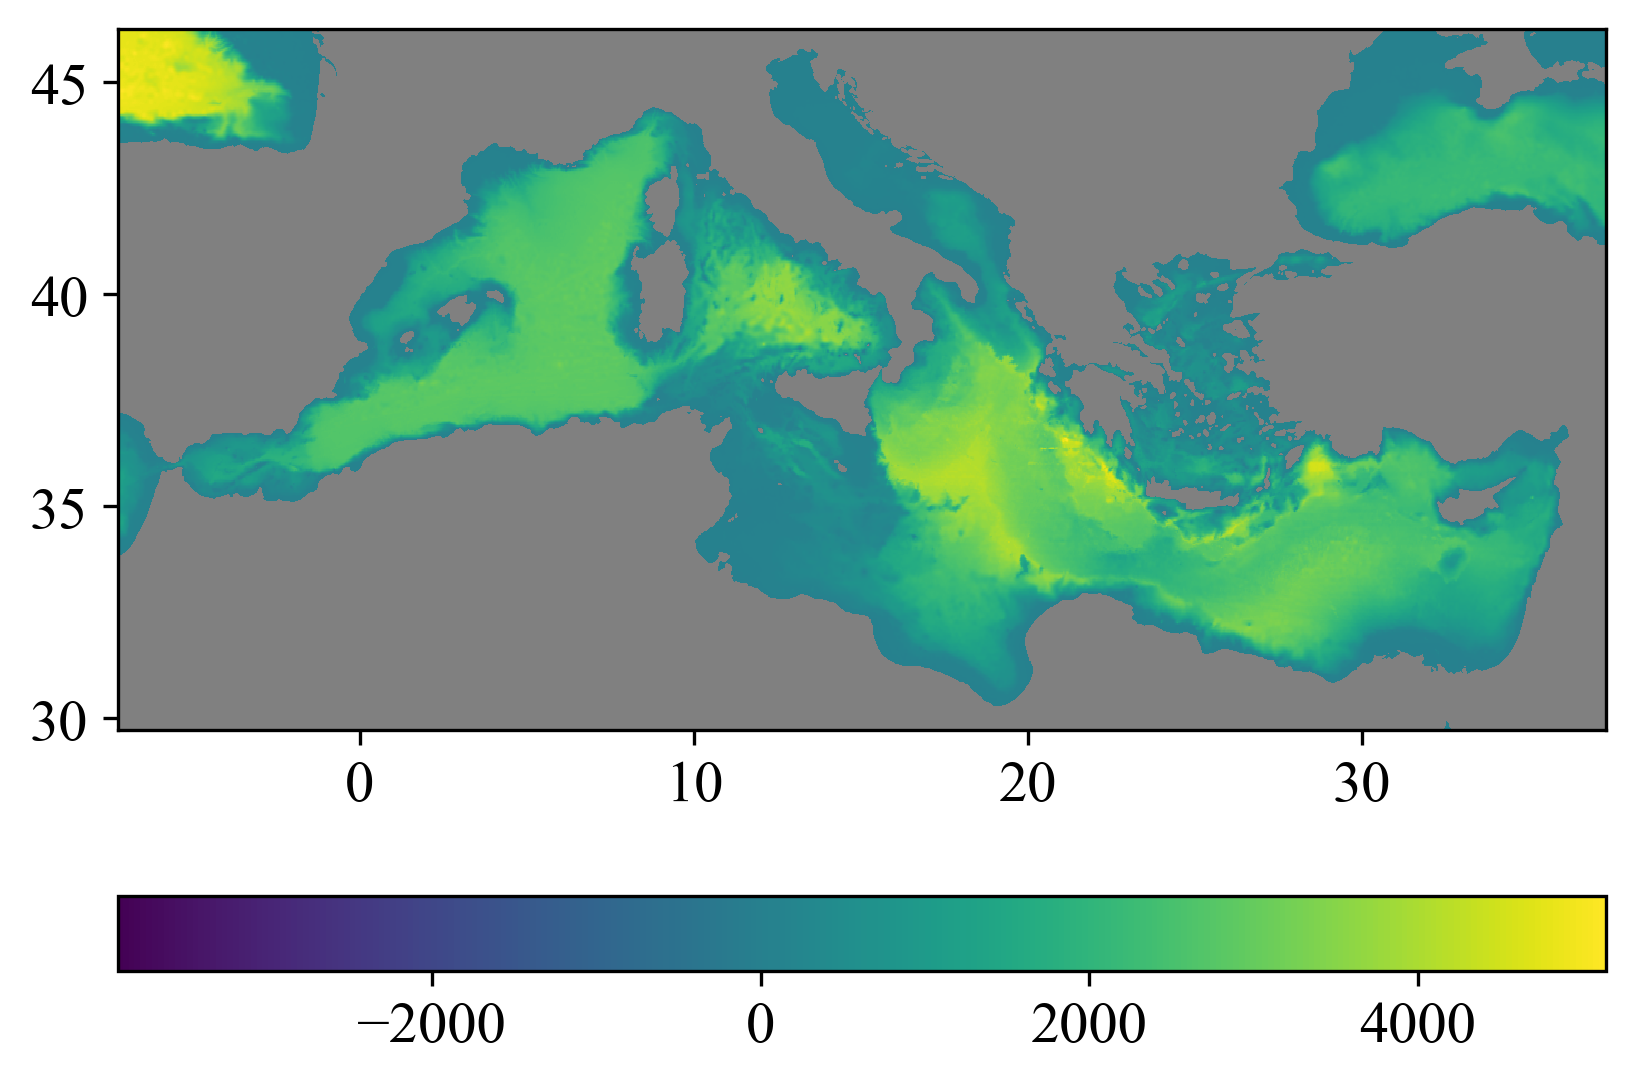

In [24]:
pcolor(bx, by, permutedims(b, [2,1]));
colorbar(orientation = "horizontal");
contourf(bx, by, copy(b'), levels = [-1e5,0], colors = [[.5,.5,.5]])
# compute and set the correct aspect ratio
aspect_ratio = 1/cos(mean(latr) * pi/180)
gca().set_aspect(aspect_ratio)

Plotting gotchas:
* `colorbar()` refers to the last added item. If the last added item is the land-sea mask, the colorbar will be all gray.
* maps look nicer if you set the corresponding aspect ratio based on the average latitude `mean(latr)`.

## Data plotting
The bathymetry is used to display a land-sea mask using the `contourf` function with 2 levels.      
The data are shown as colored circles using `scatter`.

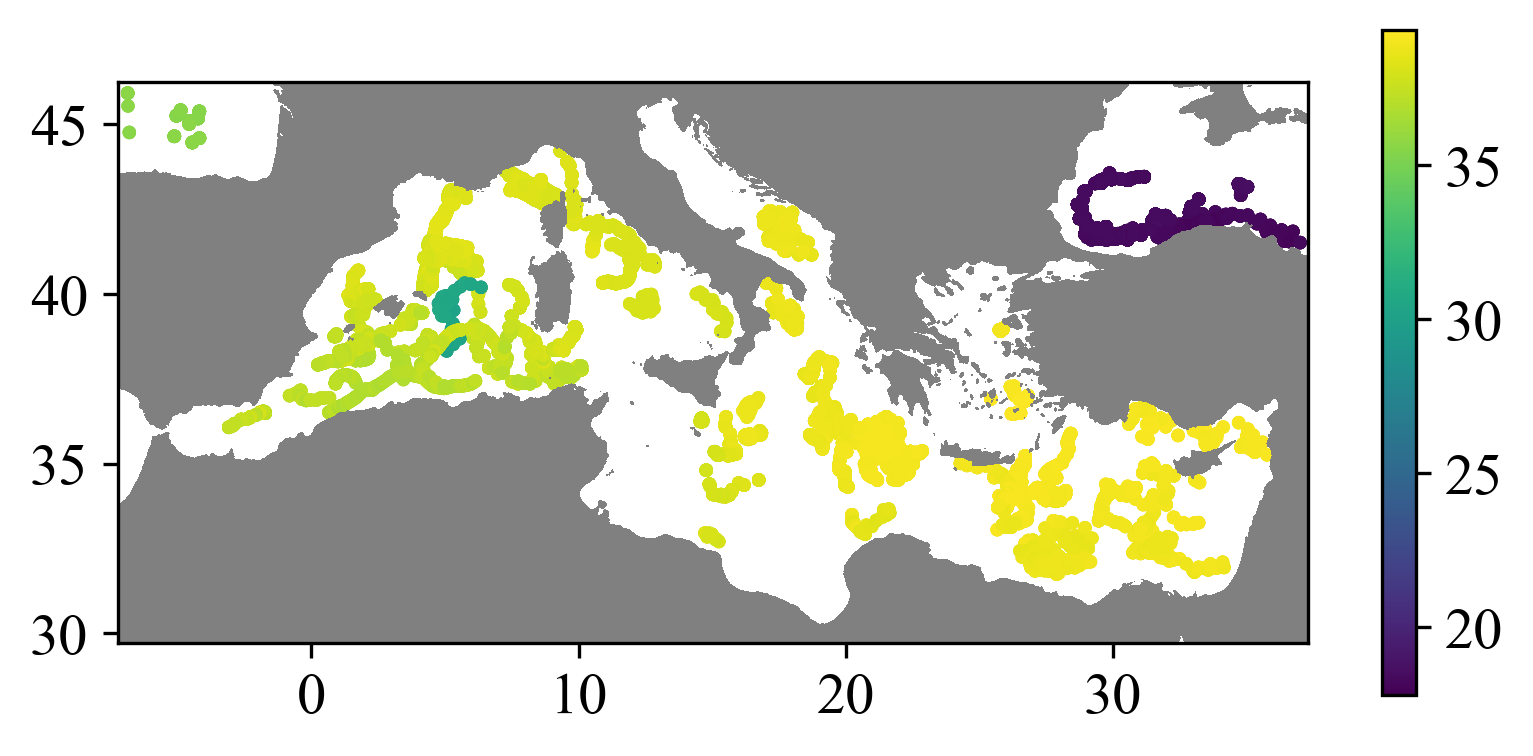

In [28]:
scatter(lonsel, latsel, 5, valsel); 
colorbar(orientation = "vertical", shrink=.6);
#clim(36,37.7)
contourf(bx, by, permutedims(b, [2,1]), levels = [-1e5,0],colors = [[.5,.5,.5]])

# compute and set the correct aspect ratio
aspect_ratio = 1/cos(mean(latr) * pi/180)
gca().set_aspect(aspect_ratio)

# Check for duplicates

There are two ways to call the function `checkduplicates`:

In [29]:
?DIVAnd.Quadtrees.checkduplicates

```
dupl = checkduplicates(x,value,delta,deltavalue)
```

Based on the coordinates `x` (a tuple of longitudes `lons`, latitudes `lats`, depths (`zs`) and times (`times` vector of `DateTime`)), search for points which are in the same spatio-temporal bounding  box of length `delta`. `delta` is a vector with 4 elements corresponding to longitude, latitude, depth and time (in days). `dupl` a vector of vectors containing the indices of the duplicates.

---

```
dupl = checkduplicates(x1,value1,x2,v2,value2,delta,deltavalue)
```

Report duplicates of observations in data set (x2,v2) which are also in data set (x1,v1). `x1` and `x2` are tuples of vectors with the coordinates, `v1` and `v2` are the corresponding values.


We load a small ODV file containing data in the same domain to test the duplicate detection.     
We use the function `ODVspreadsheet.load` available within `DIVAnd.jl`.

In [30]:
smallODVfile = "../data/small_ODV_sample.txt"
isfile(smallODVfile) ? @info("File already downloaded") : download("https://dox.ulg.ac.be/index.php/s/5FdKh6Md0VAjsIU/download", smallODVfile)

┌ Info: File already downloaded
└ @ Main In[30]:2


In [31]:
?ODVspreadsheet.load

```
 obsvalue,obslon,obslat,obsdepth,obstime,obsids = load(T,fnames,datanames;
    qv_flags = [DIVAnd.ODVspreadsheet.GOOD_VALUE,
                DIVAnd.ODVspreadsheet.PROBABLY_GOOD_VALUE],
    nametype = :P01,
    qvlocalname = "QV:SEADATANET")
```

Load all the profiles from every files listed in the array `fnames` corresponding to one of the parameter names `datanames`. If `nametype` is `:P01` (default), the datanames are P01 vocabulary names with the SDN prefix. If nametype is `:localname`, then they are the ODV column header without units.

For example if the column header is `Water body salinity [per mille]`, then `datenames` should be `["Water body salinity"]`. The resulting vectors have the data type `T` (expect `times` and `ids` which are vectors of `DateTime` and `String` respectively). Only values matching the quality flag `qv_flags` are retained. `qv_flags` is a vector of Strings (based on http://vocab.nerc.ac.uk/collection/L20/current/, e.g. "1" means "good value"). One can also use the constants these constants (prefixed with `DIVAnd.ODVspreadsheet.`):

`qvlocalname` is the column name to denote quality flags. It is assumed that the quality flags follow immediately the data column.

|                     constant | value |
| ----------------------------:| -----:|
|         `NO_QUALITY_CONTROL` |   "0" |
|                 `GOOD_VALUE` |   "1" |
|        `PROBABLY_GOOD_VALUE` |   "2" |
|         `PROBABLY_BAD_VALUE` |   "3" |
|                  `BAD_VALUE` |   "4" |
|              `CHANGED_VALUE` |   "5" |
|      `VALUE_BELOW_DETECTION` |   "6" |
|            `VALUE_IN_EXCESS` |   "7" |
|         `INTERPOLATED_VALUE` |   "8" |
|              `MISSING_VALUE` |   "9" |
| `VALUE_PHENOMENON_UNCERTAIN` |   "A" |

If the ODV does not contain a semantic header (e.g. for the aggregated ODV files), then local names must be used.

```julia-repl
julia> data,obslon,obslat,obsdepth,obstime,obsids = DIVAnd.ODVspreadsheet.load(Float64,["data_from_med_profiles_non-restricted_v2.txt"],
      ["Water body salinity"]; nametype = :localname );
```

In order to read ODV spreasheet containing World Ocean Database file `odvfile`, one can use a command like:

```julia-repl
julia> obsval,obslon,obslat,obsdepth,obstime,obsid = ODVspreadsheet.load(Float64,[odvfile],
                           ["Temperature"]; qv_flags=["0", "1"], nametype = :localname, qvlocalname = "QV:WOD");
```

i.e.,

  * explicitely specifying the accepted flags `qv_flags`
  * set `qvlocalname` as "QV:WOD".

*Note:* no checks are performed to ensure the units are consistent.

---

```
 profiles,lons,lats,depths,times,ids = load(T,dir,P01names)
```

Load all the ODV files under the directory `dir` corresponding the one of the parameter names `P01names`. The resulting vectors have the data type `T` (expect `times` and `ids` which are vectors of `DateTime` and `String`, respectively).

No checks are done to ensure the units are consistent.


In [32]:
obsval_ODV,obslon_ODV,obslat_ODV,obsdepth_ODV,obstime_ODV,obsid_ODV = ODVspreadsheet.load(Float64,[smallODVfile],
                           ["Water body salinity"]; nametype = :localname );

┌ Info: Reading data from file ../data/small_ODV_sample.txt
└ @ DIVAnd.ODVspreadsheet /home/ctroupin/.julia/packages/DIVAnd/rJCtr/src/ODVspreadsheet.jl:76
┌ Info: No. of profiles in the file: 71
└ @ DIVAnd.ODVspreadsheet /home/ctroupin/.julia/packages/DIVAnd/rJCtr/src/ODVspreadsheet.jl:253
┌ Info: Working on variable Water body salinity
└ @ DIVAnd.ODVspreadsheet /home/ctroupin/.julia/packages/DIVAnd/rJCtr/src/ODVspreadsheet.jl:777
┌ Info: Starting loop on the 71 profiles
└ @ DIVAnd.ODVspreadsheet /home/ctroupin/.julia/packages/DIVAnd/rJCtr/src/ODVspreadsheet.jl:794
┌ Info: Done reading the profiles
└ @ DIVAnd.ODVspreadsheet /home/ctroupin/.julia/packages/DIVAnd/rJCtr/src/ODVspreadsheet.jl:836


In [33]:
length(obsval_ODV)

28264

In [34]:
checkobs((obslon_ODV,obslat_ODV,obsdepth_ODV,obstime_ODV),obsval_ODV,obsid_ODV)

              minimum and maximum of obs. dimension 1: (16.72791, 17.98836)
              minimum and maximum of obs. dimension 2: (35.216, 36.25)
              minimum and maximum of obs. dimension 3: (0.0, 4020.61646)
              minimum and maximum of obs. dimension 4: (DateTime("1966-02-13T05:00:00"), DateTime("2016-11-24T10:39:00"))
                          minimum and maximum of data: (37.1775, 39.313)


┌ Info: Checking ranges for dimensions and observations
└ @ DIVAnd /home/ctroupin/.julia/packages/DIVAnd/rJCtr/src/obsstat.jl:75


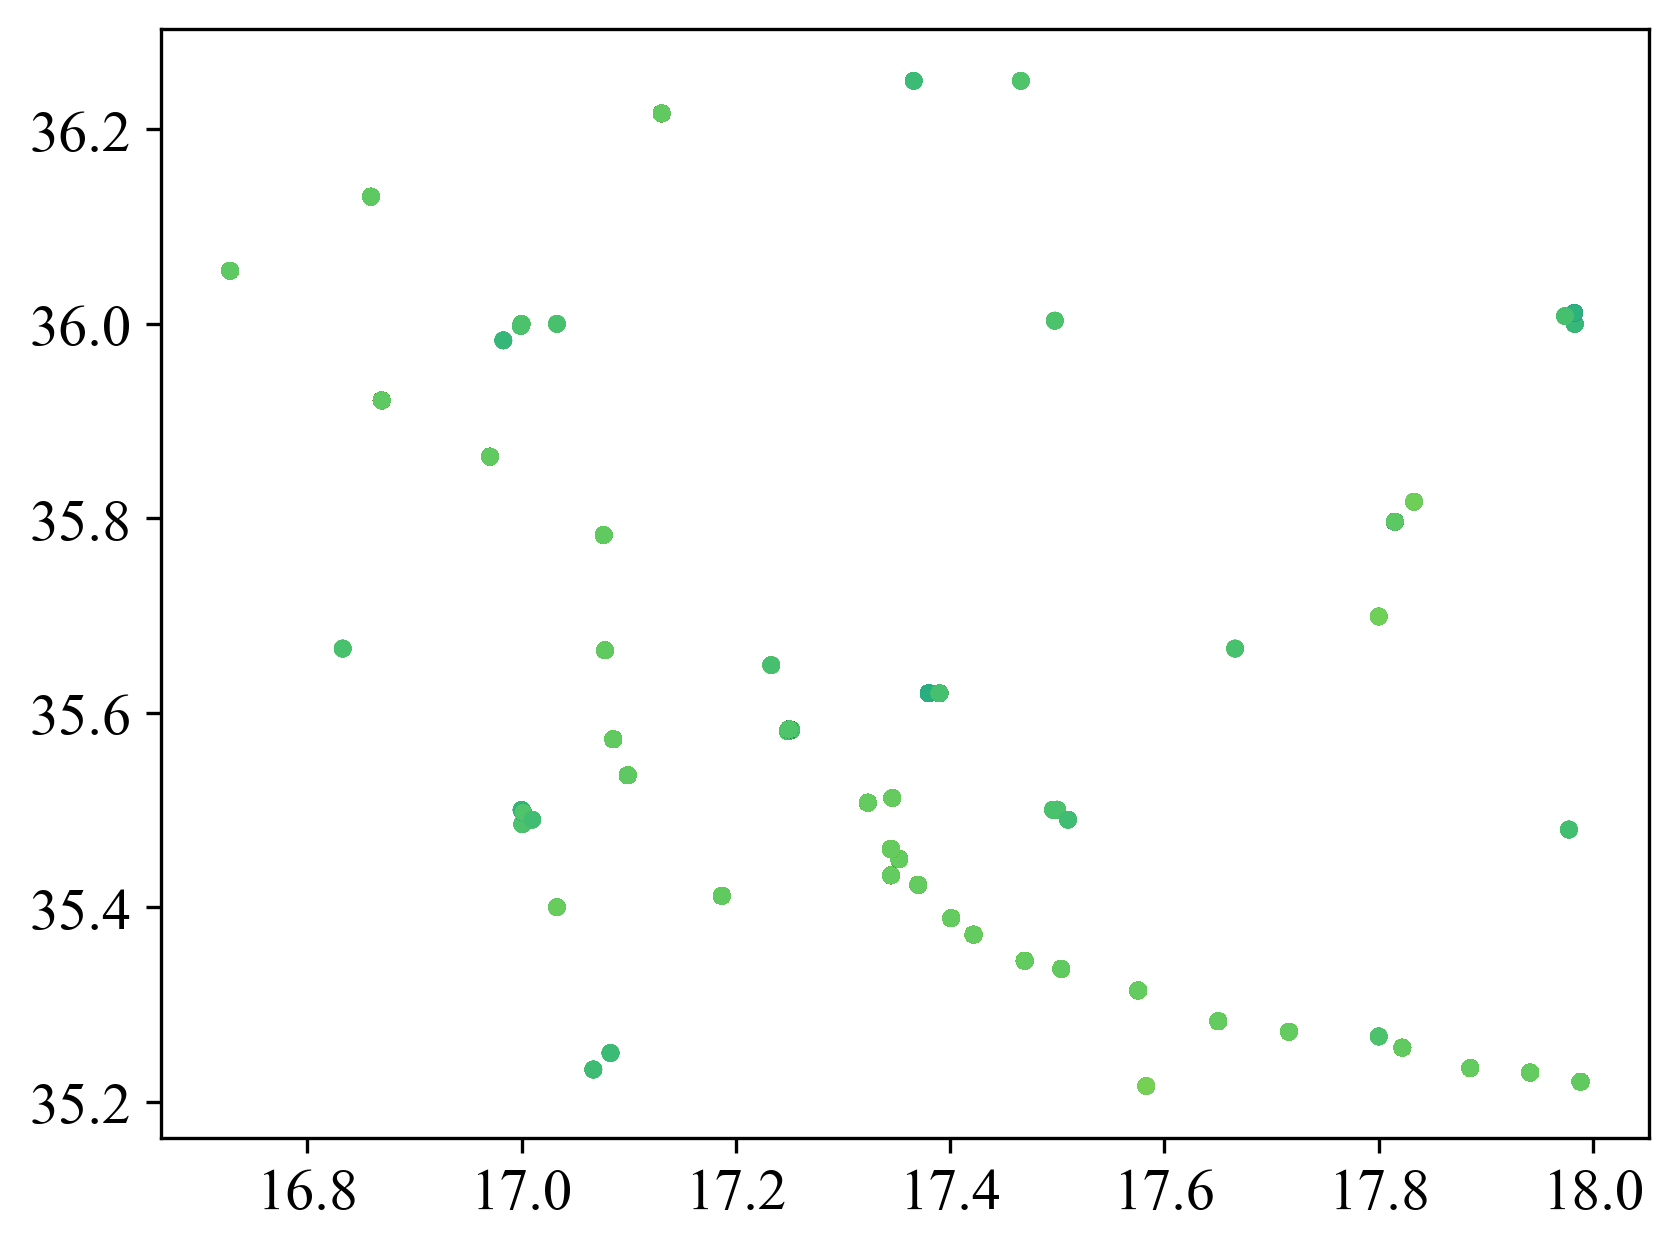

In [35]:
scatter(obslon_ODV, obslat_ODV, 10, obsval_ODV); 

Look for duplicates
* within 0.01 degree (about 1km)
* within 0.01 m depth
* within 1 minute.      

Difference in value is 0.01 psu.

In [36]:
dupl = DIVAnd.Quadtrees.checkduplicates((obslon_ODV,obslat_ODV,obsdepth_ODV,obstime_ODV),
    obsval_ODV,(obslon,obslat,obsdepth,obstime),
    obsval,(0.01,0.01,0.01,1/(24*60)),0.01);

  0.209275 seconds (181.00 k allocations: 9.483 MiB)
  0.016363 seconds (1.76 k allocations: 21.607 MiB)
 10.428432 seconds (28.65 M allocations: 1.556 GiB, 4.13% gc time)


In [37]:
size(obsval) == size(dupl)

true

* `dupl` is an array of the same length as `obsval`
* If the i-th element of `dupl` is an empty list, then the i-th element in `obsval` is probably not a duplicate
* Otherwise, the i-th element in `obsval` is probably a duplicate of the element `val_ODV` with the indices `dupl[i]`.

In [38]:
dupl[1]

Int64[]

To get a list of possible duplicates, we check for the elements of `dupl` that are not empty.

In [39]:
index = findall(.!isempty.(dupl))

651-element Array{Int64,1}:
 3195105
 3195134
 3195164
 3195169
 3195191
 3195193
 3195199
 3195217
 3195247
 3195262
 3195268
 3195288
 3195302
       ⋮
 4399050
 4399056
 4404085
 4410200
 4410209
 4410213
 4430675
 4430677
 4430679
 4430680
 4430682
 4430683

Number of duplicate candidates

In [40]:
length(index)

651

Check the first reported duplicate

In [41]:
if length(index) > 0
    index_WOD = index[1]
else
    @info("No duplicate detected")
end

3195105

Show its coordinates and value from the ODV file:

In [42]:
obslon[index_WOD],obslat[index_WOD],obsdepth[index_WOD],obstime[index_WOD],obsval[index_WOD]

(17.885482788085938, 35.23445129394531, 40.10356140136719, DateTime("2016-06-14T10:38:27.239"), 38.75)

They are quite close to the data point with the index:

In [43]:
dupl[index_WOD]

1-element Array{Int64,1}:
 20547

In [44]:
index_ODV = dupl[index_WOD][1]

20547

In [45]:
obslon_ODV[index_ODV],obslat_ODV[index_ODV],
obsdepth_ODV[index_ODV],obstime_ODV[index_ODV],
obsval_ODV[index_ODV]

(17.88548, 35.23445, 40.10361, DateTime("2016-06-14T10:39:00"), 38.75)

Indeed, it is quite likely that they are duplicates.

Combine the dataset and retain only new points from WOD

In [47]:
newpoints = findall(isempty.(dupl));
@show length(newpoints)

length(newpoints) = 4509138


4509138

In [48]:
obslon_combined   = [obslon_ODV;   obslon[newpoints]];
obslat_combined   = [obslat_ODV;   obslat[newpoints]];
obsdepth_combined = [obsdepth_ODV; obsdepth[newpoints]];
obstime_combined  = [obstime_ODV;  obstime[newpoints]];
obsval_combined   = [obsval_ODV;   obsval[newpoints]];
obsids_combined   = [obsid_ODV;   obsid[newpoints]];

## CMEMS data download
The function works in a similar way.

In [49]:
?CMEMS.download

```
CMEMS.download(lonr,latr,timerange,param,username,password,basedir[; indexURLs = ...])
```

Download in situ data within the longitude range `lonr` (an array or tuple with two elements: the minimum longitude and the maximum longitude), the latitude range `latr` (likewise), time range `timerange` (an array or tuple with two `DateTime` structures: the starting date and the end date) from the CMEMS (Copernicus Marine environment monitoring service) in situ service [^1]. `param` is one of the parameter codes as defined in [^2] or [^3]. `username` and `password` are the credentials to access data [^1] and `basedir` is the directory under which the data is saved. `indexURLs` is a list of the URL to the `index_history.txt` file. Per default, it includes the URLs of the Baltic, Arctic, North West Shelf, Iberian, Mediteranean and Black Sea Thematic Assembly Center.

As these URLs might change, the latest version of the URLs to the indexes can be obtained at [^1].

# Example

```julia-repl
julia> username = "..."
julia> password = "..."
julia> lonr = [7.6, 12.2]
julia> latr = [42, 44.5]
julia> timerange = [DateTime(2016,5,1),DateTime(2016,8,1)]
julia> param = "TEMP"
julia> basedir = "/tmp"
julia> files = CMEMS.download(lonr,latr,timerange,param,username,password,basedir)
```

[^1]: http://marine.copernicus.eu/

[^2]: http://www.coriolis.eu.org/Documentation/General-Informations-on-Data/Codes-Tables

[^3]: http://doi.org/10.13155/40846


## Exercice
1. Download data from CMEMS in the same domain and for the same time period.
2. Plot the data location on a map along with the WOD observations.
3. Check for the duplicates between the two datasets.